In [303]:
# Librerías 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.stats import median_test
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.manifold import TSNE
from scipy.stats import kstest
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import umap.umap_ as umap
from ydata_profiling import ProfileReport

#Para que grafique
%matplotlib inline

# EDA

## Inicializacion

Carga de datos y explicacion de variables.

In [4]:
import pandas as pd

dataset_raw=pd.read_csv("winequality_BDS.csv",sep=';')

dataset_raw.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates alcohol  quality  
0       0.42    11.8        6  
1       0.39    10.2        6  
2       0.53    12.7        6  
3       0.56     9.4        5  
4       0.38    10.2        5

In [5]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


1.	type: tipo de uva con la que se elabora el vino.
2.	fixed acidity: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
3.	volatile acidity: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro. 
4.	citric acid: contenido de ácido cítrico en el vino, medido en gramos por litro.
5.	residual sugar: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro. 
6.	chlorides: concentración de cloruros (sales) en el vino, medida en gramos por litro.
7.	free sulfur dioxide: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro. 
8.	total sulfur dioxide: suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
9.	density: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
10.	pH: medida de la acidez o alcalinidad del vino. 
11.	sulphates: concentración de sales de sulfato en el vino, medida en gramos por litro. 
12.	alcohol: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
13.	quality: puntuación del vino, con una escala que va de 0 a 10.


## Analisis univariado.

Analizamos los valores de cada columna y evaluamos su validez.

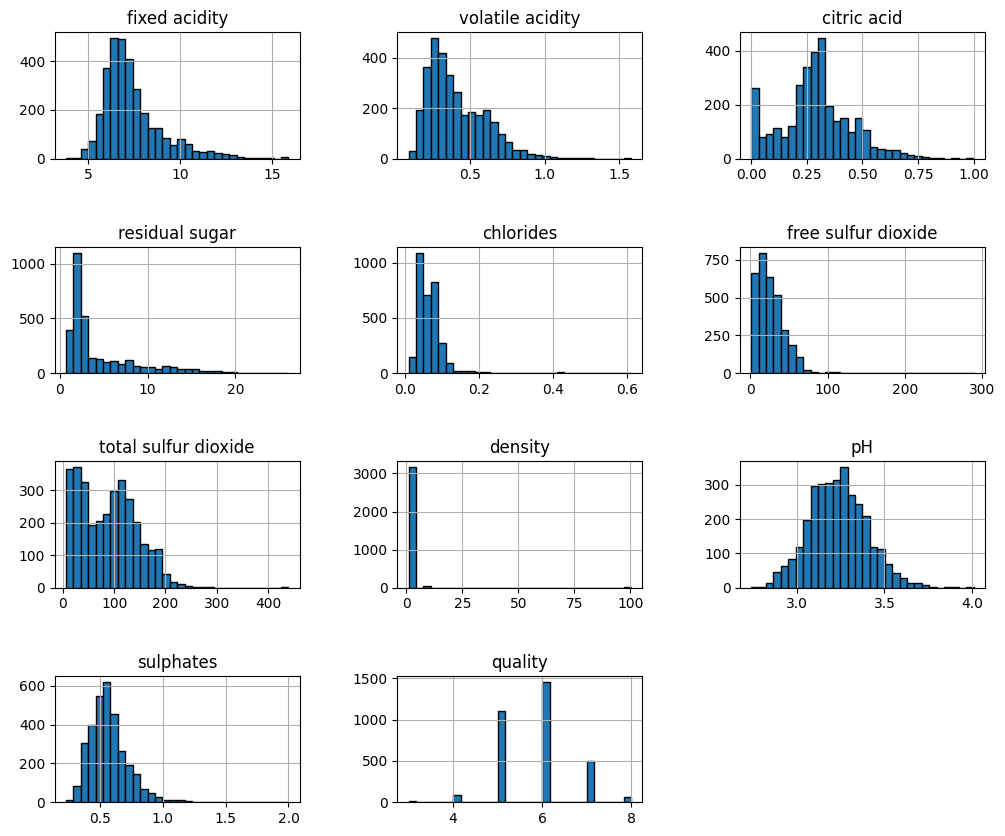

In [ ]:
import matplotlib.pyplot as plt

#Construimos histogramas mostrando la distribución de las caracteristicas
dataset_raw.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Observamos variables de manera individual:
* Las variables fixed acidity, sulphates y volatile acidity presentan un leve sesgo a derecha.
* Chlorides, Density, Free sulfur dioxide y Total sulfur dioxide están claramente afectadas por outliers.
* El histograma citric acid y total sulfur dioxide son bimodales.
* pH parece tener cierta distribucion normal pero no del todo.

Para complementar este análisis gráfico, visualizaremos las estadísticas de cada variable:

In [217]:
dataset_raw.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3231.000000       3231.000000  3231.000000     3231.000000   
mean        7.414082          0.403802     0.288028        4.526339   
std         1.598760          0.189421     0.156842        4.143991   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.360000     0.280000        2.500000   
75%         8.000000          0.530000     0.370000        6.100000   
max        15.900000          1.580000     1.000000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3231.000000          3231.000000           3231.000000  3231.000000   
mean      0.066149            25.649335             88.349892     1.901500   
std       0.041908            17.422288             54.633913     8.747779   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             38.000000     0.992550   
50%       0.058000            23.000000             89.000000     0.995500   
75%       0.080000            35.000000            127.000000     0.997230   
max       0.611000           289.000000            440.000000   100.369000   

                pH    sulphates      quality  
count  3231.000000  3231.000000  3231.000000  
mean      3.235908     0.573680     5.785825  
std       0.164921     0.166353     0.829374  
min       2.740000     0.230000     3.000000  
25%       3.120000     0.470000     5.000000  
50%       3.230000     0.550000     6.000000  
75%       3.340000     0.650000     6.000000  
max       4.010000     2.000000     8.000000

Confirmamos que es altamente probable que chlorides, free sulfur dioxide, total sulfur dioxide y density tengan outliers que haya que tratar.

### Alcohol

Revisamos a detalle los valores de la columna alcohol, ya que aparece como object, cuando en el head() vimos que había float:

In [218]:
for idx, val in dataset_raw["alcohol"].value_counts().sort_index().items():
    print(idx,val)

10 98
10.1 81
10.15 3
10.2 81
10.3 53
10.4 87
10.5 107
10.55 4
10.6 58
10.65 1
10.7 64
10.75 1
10.8 86
10.9 80
10.98 1
100.333.333.333.333 3
101.333.333.333.333 2
104.666.666.666.667 2
105.333.333.333.333 1
105.666.666.666.667 1
109.333.333.333.333 2
109.666.666.666.667 3
11 120
11.05 2
11.1 70
11.2 90
11.3 74
11.35 1
11.4 72
11.45 4
11.5 65
11.55 1
11.6 31
11.65 1
11.7 45
11.75 2
11.8 56
11.85 1
11.9 33
11.94 2
11.95 2
110.666.666.666.667 2
112.666.666.666.667 1
113.333.333.333.333 3
113.666.666.666.667 1
114.333.333.333.333 1
114.666.666.666.667 1
116.333.333.333.333 2
117.333.333.333.333 1
12 52
12.05 1
12.1 33
12.15 2
12.2 45
12.25 1
12.3 36
12.4 47
12.5 62
12.6 30
12.7 34
12.75 3
12.8 42
12.9 30
120.666.666.666.667 1
123.333.333.333.333 1
128.933.333.333.333 2
13 31
13.05 1
13.1 18
13.2 13
13.3 6
13.4 18
13.5 6
13.55 1
13.6 13
13.7 3
13.8 2
13.9 2
131.333.333.333.333 1
135.666.666.666.667 1
14 9
14.05 1
14.2 1
14.9 1
8.4 5
8.5 5
8.6 2
8.7 19
8.8 33
8.9 16
9 68
9.05 1
9.1 71
9.2 13

Vemos que hay valores que suponemos que son periodicos mal cargados.

### Fixed acidity (Ácidos no volatiles)

Analizamos la columna fixed acidity.

In [52]:
dataset_raw["fixed acidity"].value_counts().sort_index()

fixed acidity
3.8     1
3.9     1
4.4     3
4.6     1
4.7     6
       ..
14.3    1
15.0    2
15.5    2
15.6    2
15.9    1
Name: count, Length: 100, dtype: int64

Siendo el valor minimo 3.8 y el máximo 15.9, no parece haber nulos o outliers.

### Volatile acidity (Ácidos volátiles)

Analizamos la columna volatile acidity.

In [220]:
dataset_raw["volatile acidity"].value_counts().sort_index()

volatile acidity
0.085     1
0.090     1
0.105     4
0.110     5
0.120    10
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Name: count, Length: 172, dtype: int64

Siendo el minimo 0.085 y el máximo 1.58 no parece haber nulos ni outliers.

### Citric acid (Ácidos cítricos)

Analizamos la columna citric acid.

In [221]:
for a,b in dataset_raw["citric acid"].value_counts().sort_index().items():
    print(a,b)

0.0 140
0.01 37
0.02 53
0.03 30
0.04 32
0.05 21
0.06 26
0.07 22
0.08 33
0.09 37
0.1 40
0.11 16
0.12 36
0.13 22
0.14 28
0.15 29
0.16 24
0.17 29
0.18 45
0.19 45
0.2 64
0.21 62
0.22 74
0.23 71
0.24 117
0.25 92
0.26 130
0.27 125
0.28 156
0.29 115
0.3 146
0.31 86
0.32 126
0.33 88
0.34 78
0.35 59
0.36 59
0.37 52
0.38 42
0.39 46
0.4 56
0.41 40
0.42 38
0.43 18
0.44 35
0.45 36
0.46 29
0.47 30
0.48 38
0.49 81
0.5 35
0.51 21
0.52 28
0.53 21
0.54 19
0.55 12
0.56 12
0.57 15
0.58 10
0.59 9
0.6 11
0.61 5
0.62 5
0.63 10
0.64 9
0.65 7
0.66 16
0.67 4
0.68 11
0.69 6
0.7 2
0.71 4
0.72 2
0.73 4
0.74 5
0.75 1
0.76 3
0.78 2
0.79 2
0.82 1
0.86 1
0.91 2
1.0 2


Analizamos aquellos vinos con citric acid en 0 para buscar algun comportamiento extraño en las otras variables.

In [55]:
cero_citric_acid=dataset_raw[dataset_raw["citric acid"]==0].drop(columns="citric acid")

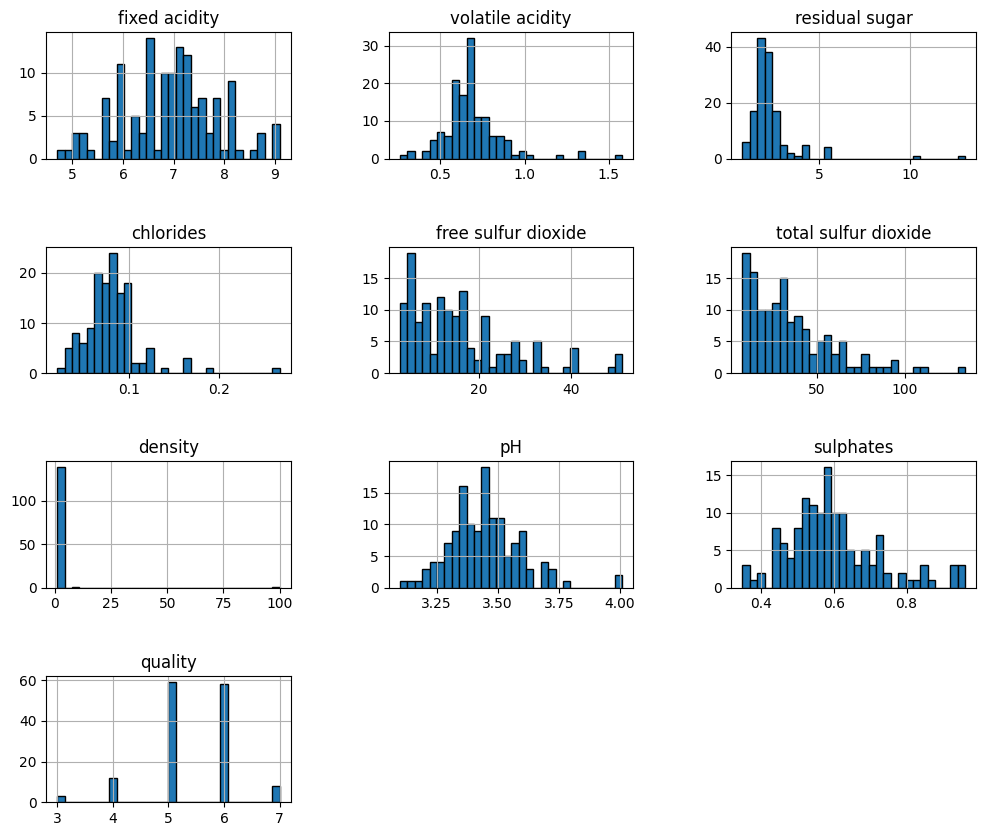

In [56]:
cero_citric_acid.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Más alla de los problemas que heredó del dataset completo (p.e. outliers de densidad), no parece que estos vinos sean datos sucios.

### Residual sugar (Azúcar residual)

Analizamos la columna residual sugar.

In [57]:
dataset_raw["residual sugar"].value_counts().sort_index()

residual sugar
0.70      2
0.80      5
0.90     16
1.00     29
1.10     53
         ..
20.15     1
20.30     1
20.80     1
22.60     1
26.05     2
Name: count, Length: 234, dtype: int64

No parece haber nulos o outliers.

### Chlorides (Concentración de cloruros)

Analizamos la columna chlorides.

In [223]:
for a,b in dataset_raw["chlorides"].value_counts().sort_index().items():
    print(a,b)

0.009 1
0.012 2
0.013 1
0.014 2
0.015 4
0.016 1
0.017 3
0.018 4
0.019 1
0.02 6
0.021 6
0.022 7
0.023 9
0.024 8
0.025 7
0.026 19
0.027 18
0.028 24
0.029 26
0.03 37
0.031 35
0.032 52
0.033 43
0.034 52
0.035 59
0.036 81
0.037 52
0.038 52
0.039 45
0.04 54
0.041 59
0.042 61
0.043 43
0.044 74
0.045 41
0.046 55
0.047 63
0.048 80
0.049 50
0.05 71
0.051 48
0.052 48
0.053 49
0.054 46
0.055 27
0.056 35
0.057 40
0.058 29
0.059 29
0.06 34
0.061 16
0.062 32
0.063 26
0.064 26
0.065 24
0.066 37
0.067 27
0.068 34
0.069 28
0.07 37
0.071 48
0.072 24
0.073 35
0.074 56
0.075 46
0.076 55
0.077 47
0.078 51
0.079 43
0.08 66
0.081 40
0.082 46
0.083 35
0.084 50
0.085 27
0.086 34
0.087 27
0.088 33
0.089 25
0.09 22
0.091 19
0.092 22
0.093 21
0.094 22
0.095 24
0.096 21
0.097 19
0.098 15
0.099 8
0.1 13
0.101 5
0.102 10
0.103 7
0.104 16
0.105 7
0.106 8
0.107 9
0.108 2
0.109 3
0.11 10
0.111 7
0.112 6
0.113 1
0.114 11
0.115 5
0.116 2
0.117 7
0.118 9
0.119 3
0.12 4
0.121 2
0.122 7
0.123 6
0.124 3
0.125 1
0.126 1
0.127 

A simple vista parece no haber valores problemáticos, pero reforzaremos el análisis con un boxplot:

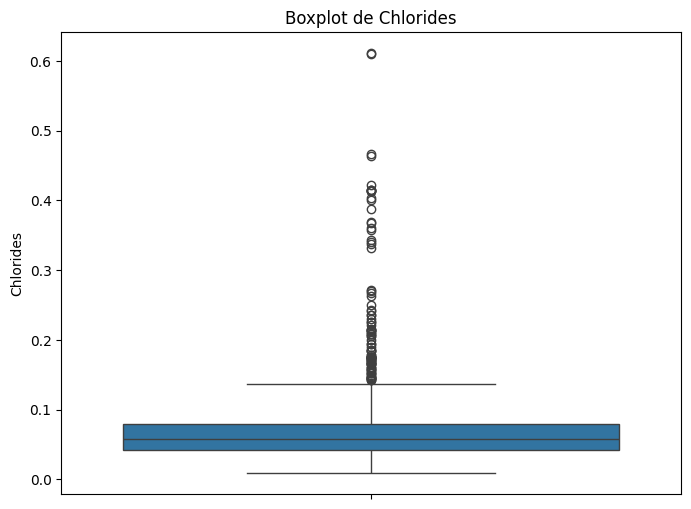

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(y="chlorides", data=dataset_raw)

# Agregar etiquetas a los ejes
plt.ylabel("Chlorides")

# Agregar un título al gráfico
plt.title("Boxplot de Chlorides")

# Mostrar el gráfico
plt.show()

La columna chlorides es afectada por outliers.

### Free sulfur dioxide (Anhidrido sulfuroso libre)

Analizamos la columna free sulfur dioxide.

In [61]:
dataset_raw["free sulfur dioxide"].value_counts().sort_index()

free sulfur dioxide
1.0        3
2.0        2
3.0       51
4.0       43
5.0      110
        ... 
105.0      2
108.0      3
112.0      1
124.0      1
289.0      1
Name: count, Length: 99, dtype: int64

Siendo el mínimo 1 y el máximo 289, suponemos que este último es un outlier (habiendo una diferencia de más de 160 mg/l con el valor anterior). 

### Total sulfur dioxide (Anhidrido sulfuroso total)

Analizamos la columna total sulfur dioxide.

In [62]:
dataset_raw["total sulfur dioxide"].value_counts().sort_index()

total sulfur dioxide
6.0       3
7.0       4
8.0      14
9.0      15
10.0     28
         ..
251.0     1
259.0     1
278.0     1
289.0     1
440.0     1
Name: count, Length: 228, dtype: int64

Entendiendo la relacion de esta variable con la anterior (siendo esta es la suma de la anterior más otro valor), veremos si se trata del mismo vino:

In [63]:
vino289=dataset_raw[dataset_raw["free sulfur dioxide"]==289]

print(vino289)

          type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1479  Moscatel            6.1              0.26         0.25             2.9   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1479      0.047                289.0                 440.0  0.99314  3.44   

      sulphates alcohol  quality  
1479       0.64    10.5        3  


Efectivamente se trata de la misma fila que actúa como outlier para ambas variables.

### Density (Densidad)

Analizamos la columna density.

In [64]:
dataset_raw["density"].value_counts().sort_index()

density
0.98711      1
0.98722      1
0.98740      1
0.98742      2
0.98746      2
            ..
100.24200    2
100.28900    1
100.29500    2
100.31500    3
100.36900    2
Name: count, Length: 865, dtype: int64

Valores por encima de 1g/L nos indican que muy probablemente hayan sido mal cargados.

### pH

Analizamos la columna pH.

In [65]:
dataset_raw["pH"].value_counts().sort_index()

pH
2.74    1
2.79    1
2.80    1
2.82    1
2.83    4
       ..
3.76    1
3.78    2
3.85    1
3.90    2
4.01    2
Name: count, Length: 98, dtype: int64

Siendo 2.74 el valor mínimo y el máximo 4.01, se asume que son válidos y no hay nulos o outliers.

### Sulphates (Concentración de sales de sulfato)

In [66]:
dataset_raw["sulphates"].value_counts().sort_index()

sulphates
0.23    1
0.25    1
0.26    3
0.27    6
0.28    2
       ..
1.61    1
1.62    1
1.95    2
1.98    1
2.00    1
Name: count, Length: 110, dtype: int64

Siendo el mínimo 0.23 y el máximo 2.0 no parece haber nulos o outliers.

### Quality (Puntuacion de calidad del vino de consumidores)

Analizamos la columna quality.

In [67]:
dataset_raw["quality"].value_counts().sort_index()

quality
3      14
4      92
5    1103
6    1453
7     501
8      68
Name: count, dtype: int64

Los valores son validos.

## Transformar los datos
Tomamos decisiones sobre los datos sucios.

Una vez vistos los valores de cada columna, decidimos transformar los tipos de columna a los correctos, eliminar aquellas muestras que tienen valores fuera de rango (en anhidrido sulfuroso libre y total) y aquellas muestras que suponemos que tienen datos que fueron mal cargados (en densidad y alcohol).

In [68]:
# Copiamos el dataset a uno que podamos transformar.
preprocessed_dataset=dataset_raw.copy()

Columna 'type' (object -> string)

In [70]:
preprocessed_dataset["type"]=preprocessed_dataset["type"].astype("string")

Columnas 'total sulfur dioxide' y 'free sulfur dioxide' (descarte de outlier)

In [71]:
#Mantenemos solo las filas que no tengan "total sulfur dioxide" igual a 440.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["total sulfur dioxide"]!=440.0]

Columnas 'alcohol', 'chlorides' y 'density' (descarte de filas mal cargadas y outliers) 

In [73]:
# Mantenemos solo las filas que el valor en alcohol tenga una longitud menor a 8 caracteres.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset['alcohol'].astype(str).str.len() < 8]

In [74]:
# Tranformamos la columna de object a float64.
preprocessed_dataset["alcohol"]=preprocessed_dataset["alcohol"].astype("float64")

In [75]:
# Mantenemos solo las filas que tengan una densidad menor a 1.02.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["density"]<=1.020]

In [76]:
# Mantenemos solo las filas que tengan una concentracion de cloruros menor a 0.3.
preprocessed_dataset=preprocessed_dataset[preprocessed_dataset["chlorides"]<=0.3]

Realizadas las transformaciones y ahora con datos válidos, visualizamos los histogramas de cada columna.

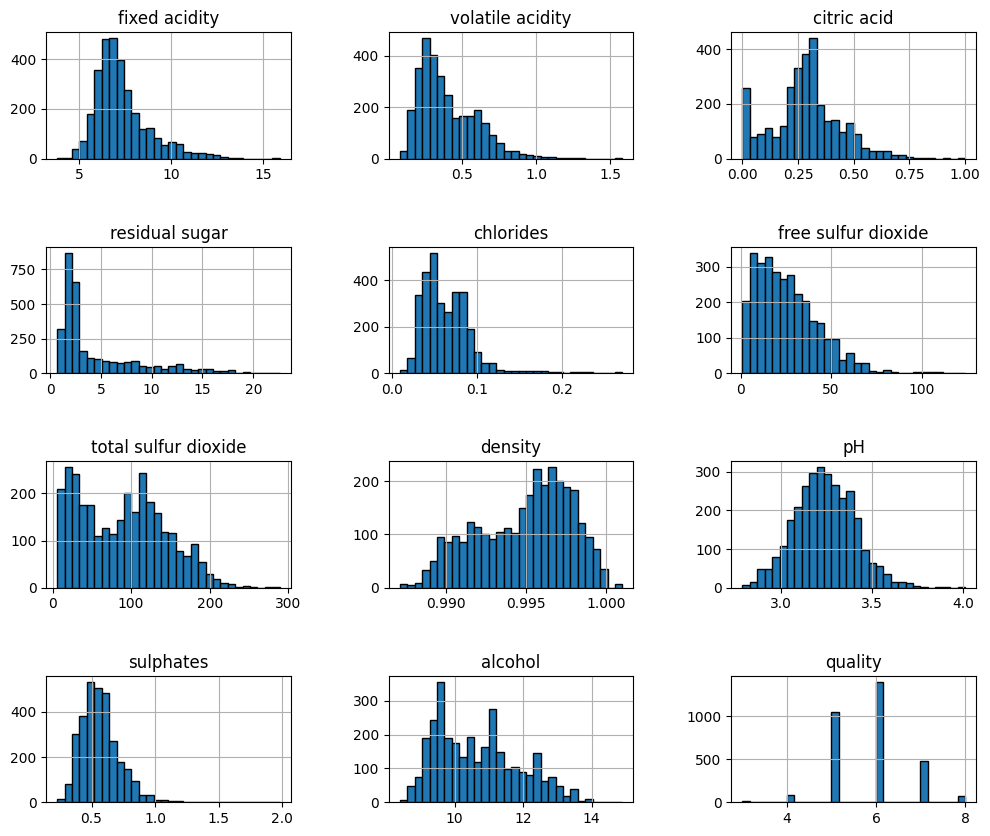

In [78]:
preprocessed_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

## Analisis bivariado

Con el objetivo de poder detectar mejor las correlaciones entre las variables, vamos a dividir el dataset por tipo. 

In [240]:
syrah_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Syrah"]
syrah_dataset=syrah_dataset.drop(columns="type")

moscatel_dataset=preprocessed_dataset[preprocessed_dataset["type"]=="Moscatel"]
moscatel_dataset=moscatel_dataset.drop(columns="type")

In [241]:
from ydata_profiling import ProfileReport

report0 = ProfileReport(preprocessed_dataset)

# descargamos el reporte como archivo html
report0.to_file("vinos_profilereport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [242]:
from ydata_profiling import ProfileReport

#report1 = ProfileReport(syrah_dataset)
#report2 = ProfileReport(moscatel_dataset)

# descargamos el reporte como archivo html
#report1.to_file("syrah_profilereport.html")
#report2.to_file("moscatel_profilereport.html")

In [243]:
preprocessed_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3113.000000       3113.000000  3113.000000     3113.000000   
mean        7.334918          0.403291     0.283688        4.471603   
std         1.460730          0.190242     0.154151        4.068225   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.350000     0.280000        2.400000   
75%         7.900000          0.530000     0.360000        6.100000   
max        15.900000          1.580000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3113.000000          3113.000000           3113.000000  3113.000000   
mean      0.065450            25.576614             88.376004     0.994862   
std       0.039766            16.758779             54.268054     0.002907   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             38.000000     0.992500   
50%       0.057000            23.000000             90.000000     0.995460   
75%       0.080000            35.000000            127.000000     0.997160   
max       0.467000           124.000000            289.000000     1.001000   

                pH    sulphates      alcohol      quality  
count  3113.000000  3113.000000  3113.000000  3113.000000  
mean      3.238278     0.570819    10.646068     5.787986  
std       0.164904     0.163843     1.211211     0.830041  
min       2.790000     0.230000     8.400000     3.000000  
25%       3.130000     0.460000     9.600000     5.000000  
50%       3.230000     0.550000    10.500000     6.000000  
75%       3.350000     0.640000    11.400000     6.000000  
max       4.010000     1.980000    14.900000     8.000000

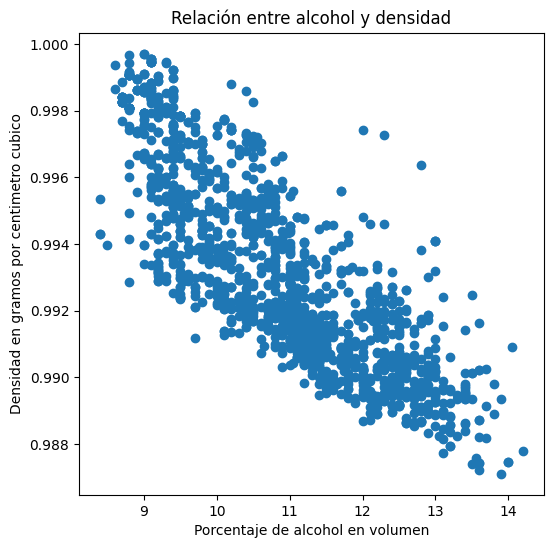

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(moscatel_dataset["alcohol"], moscatel_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("Porcentaje de alcohol en volumen")
plt.ylabel("Densidad en gramos por centimetro cubico")

# Agregar un título al gráfico
plt.title("Relación entre alcohol y densidad")

# Mostrar el gráfico
plt.show()

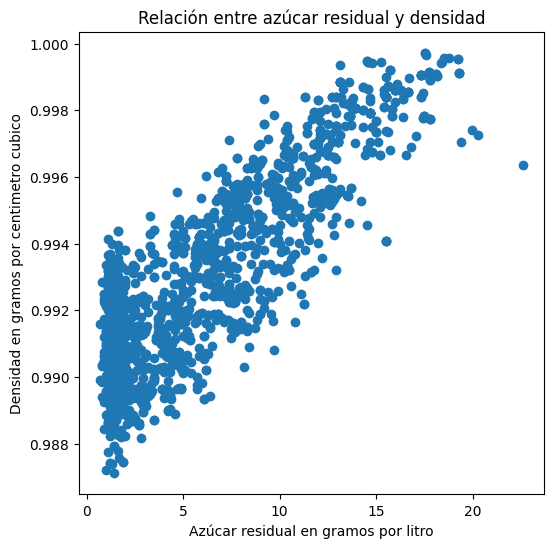

In [245]:
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(moscatel_dataset["residual sugar"], moscatel_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("Azúcar residual en gramos por litro")
plt.ylabel("Densidad en gramos por centimetro cubico")

# Agregar un título al gráfico
plt.title("Relación entre azúcar residual y densidad")

# Mostrar el gráfico
plt.show()

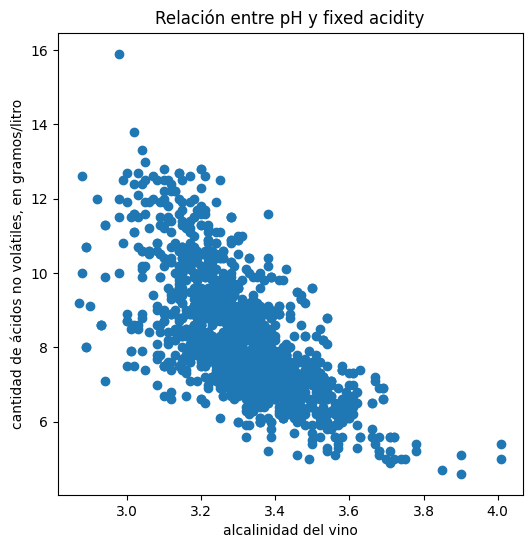

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(syrah_dataset["pH"], syrah_dataset["fixed acidity"])

# Agregar etiquetas a los ejes
plt.xlabel("alcalinidad del vino")
plt.ylabel("cantidad de ácidos no volátiles, en gramos/litro")

# Agregar un título al gráfico
plt.title("Relación entre pH y fixed acidity")

# Mostrar el gráfico
plt.show()

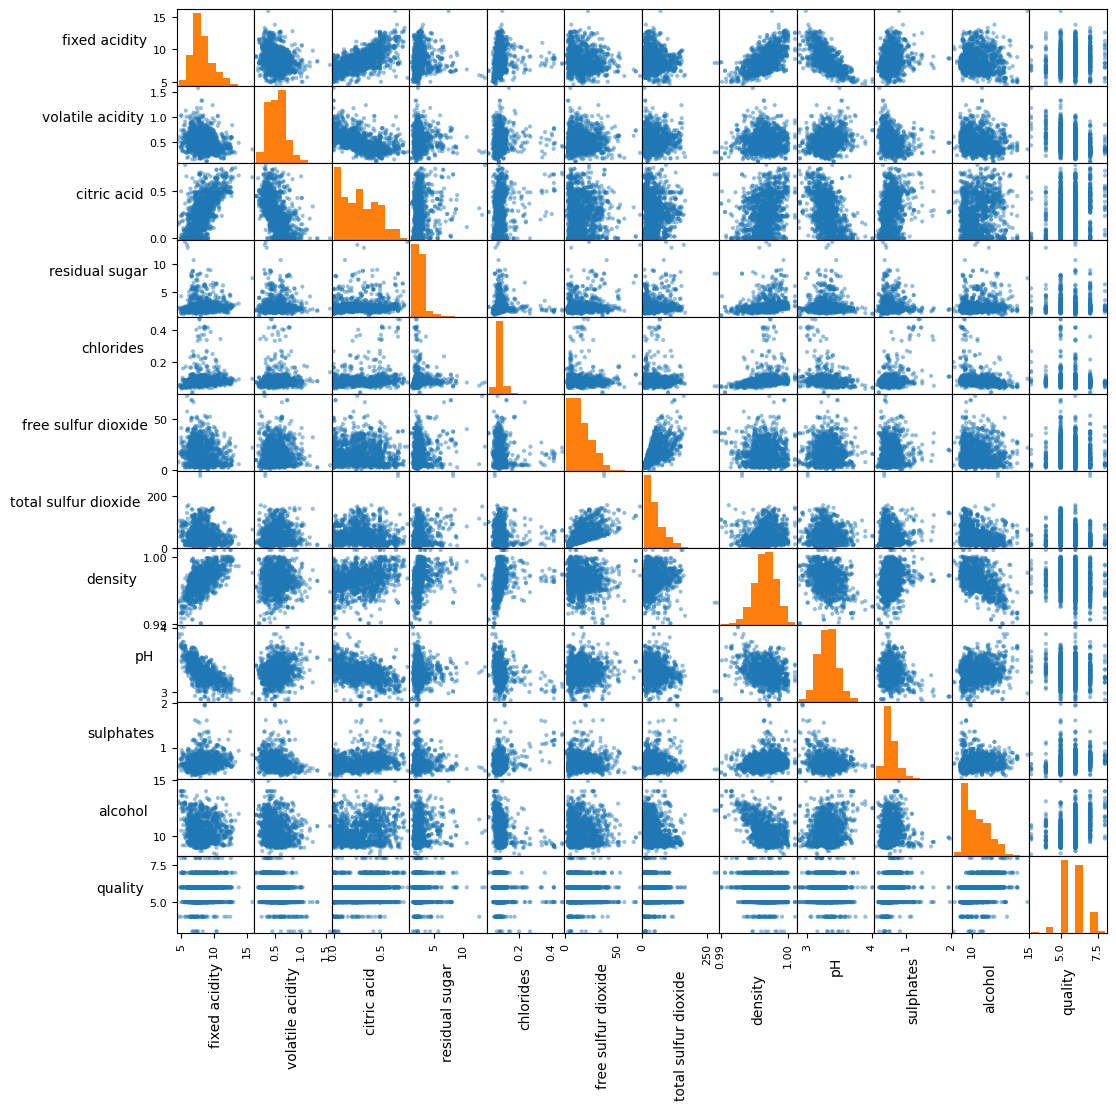

In [247]:
# Seleccionar las columnas numéricas
numeric_cols = syrah_dataset.select_dtypes(include=['number'])

# Crear el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_cols.columns)):
  for j in range(len(numeric_cols.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
# Crear el gráfico de dispersión
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(syrah_dataset["residual sugar"], syrah_dataset["density"])

# Agregar etiquetas a los ejes
plt.xlabel("Azúcar residual en gramos por litro")
plt.ylabel("Densidad en gramos por centimetro cubico")

# Agregar un título al gráfico
plt.title("Relación entre azúcar residual y densidad")

# Mostrar el gráfico
plt.show()

NameError: name 'syrah_dataset' is not defined

<Figure size 600x600 with 0 Axes>

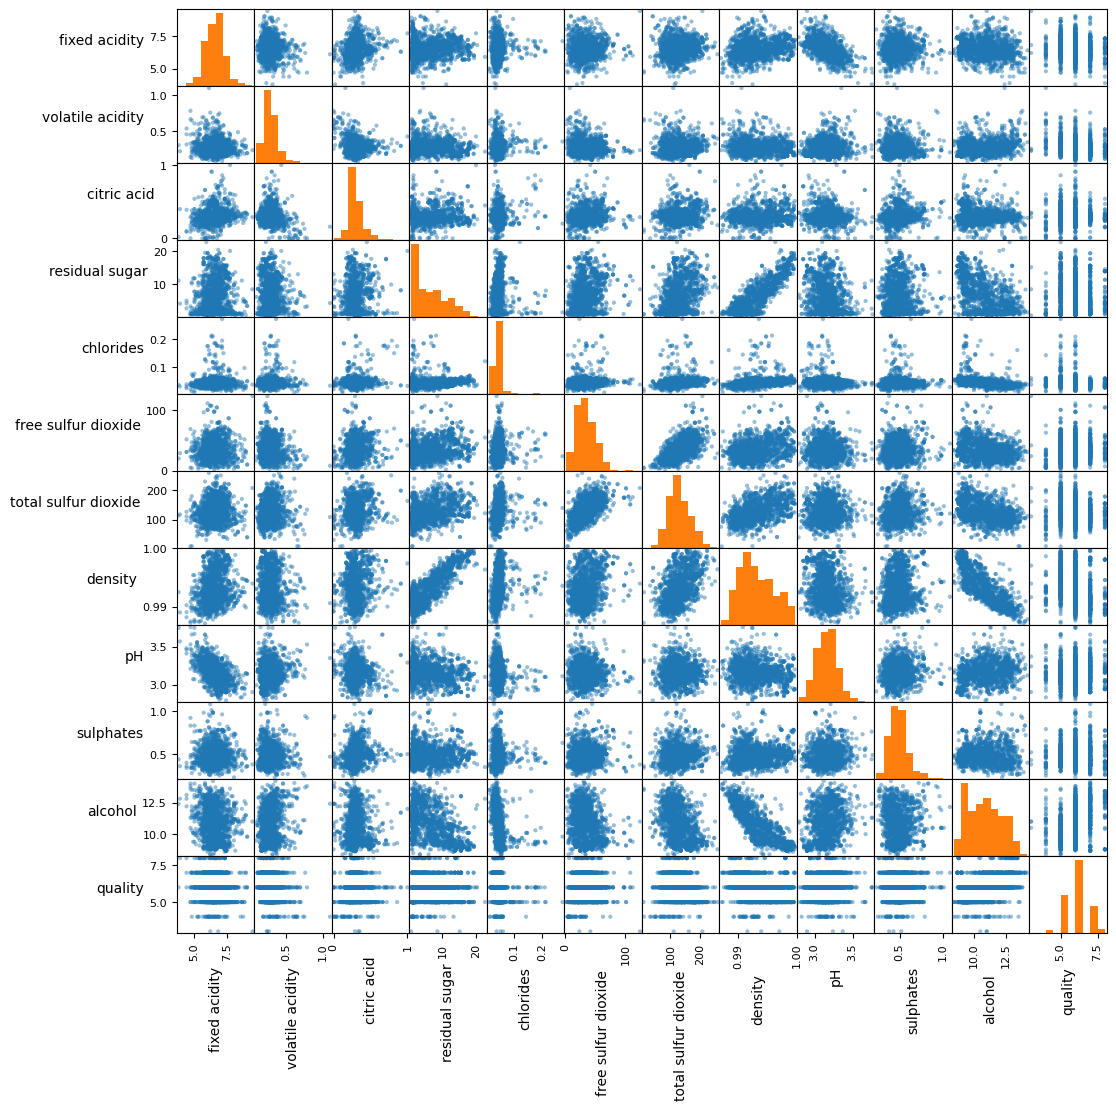

In [249]:
# Seleccionar las columnas numéricas
numeric_cols = moscatel_dataset.select_dtypes(include=['number'])

# Crear el scatter matrix
axs = pd.plotting.scatter_matrix(numeric_cols, figsize=(12, 12), alpha=0.47, hist_kwds={'color':'#ff7f0e'})
# la mostramos por pantalla
# acomodamos la orientación del contenido de los ejes
for i in range(len(numeric_cols.columns)):
  for j in range(len(numeric_cols.columns)):
    ax=axs[i,j]
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

## Analisis multivariado

### General

#### PCA

In [17]:
#Para analizar PCA, descartamos las columnas con variables cualitativas.
pca_dataset=preprocessed_dataset.drop(columns=["quality","type"])

In [18]:
#Analizamos el desvio de cada variable
pca_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3113.000000       3113.000000  3113.000000     3113.000000   
mean        7.334918          0.403291     0.283688        4.471603   
std         1.460730          0.190242     0.154151        4.068225   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.900000   
50%         7.000000          0.350000     0.280000        2.400000   
75%         7.900000          0.530000     0.360000        6.100000   
max        15.900000          1.580000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3113.000000          3113.000000           3113.000000  3113.000000   
mean      0.065450            25.576614             88.376004     0.994862   
std       0.039766            16.758779             54.268054     0.002907   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             38.000000     0.992500   
50%       0.057000            23.000000             90.000000     0.995460   
75%       0.080000            35.000000            127.000000     0.997160   
max       0.467000           124.000000            289.000000     1.001000   

                pH    sulphates      alcohol  
count  3113.000000  3113.000000  3113.000000  
mean      3.238278     0.570819    10.646068  
std       0.164904     0.163843     1.211211  
min       2.790000     0.230000     8.400000  
25%       3.130000     0.460000     9.600000  
50%       3.230000     0.550000    10.500000  
75%       3.350000     0.640000    11.400000  
max       4.010000     1.980000    14.900000

In [21]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# estandarizamos X
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(pca_dataset)

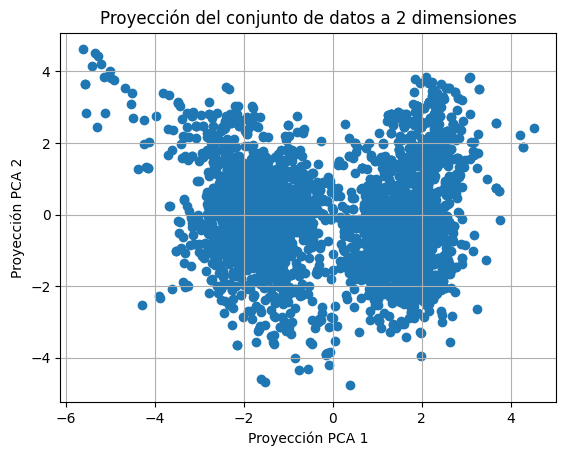

In [23]:
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset_scaled)
# graficamos los datos
plt.scatter(dataset_pca[:,0], dataset_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

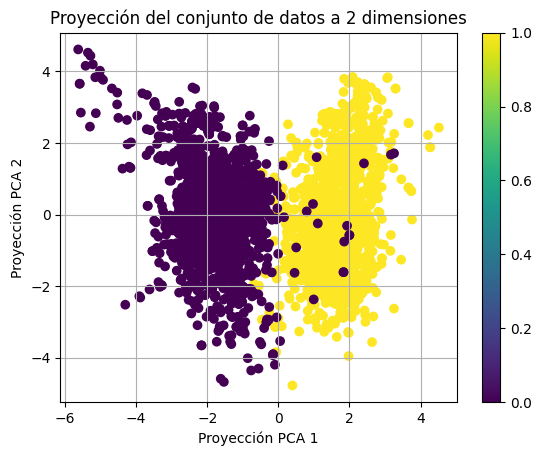

In [32]:
plt.scatter(dataset_pca[:,0], dataset_pca[:,1], c=preprocessed_dataset["type"].map({"Moscatel" : 1 , "Syrah" : 0}), cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

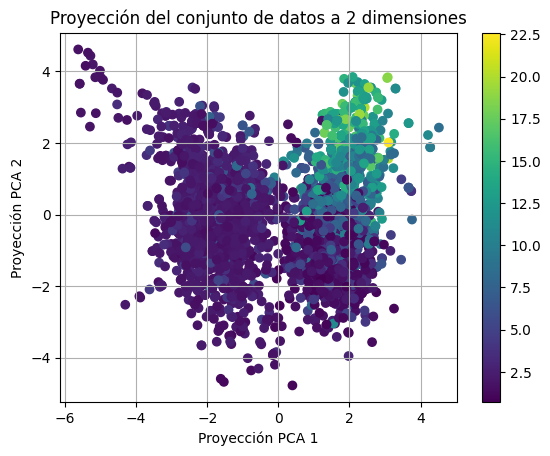

In [33]:
plt.scatter(dataset_pca[:,0], dataset_pca[:,1], c=preprocessed_dataset["residual sugar"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

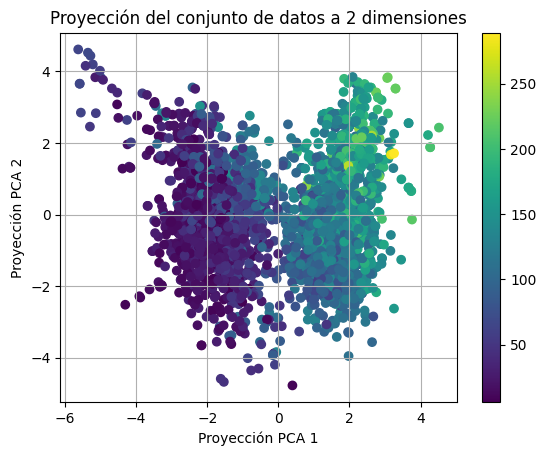

In [ ]:
plt.scatter(dataset_pca[:,0], dataset_pca[:,1], c=preprocessed_dataset["total sulfur dioxide"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

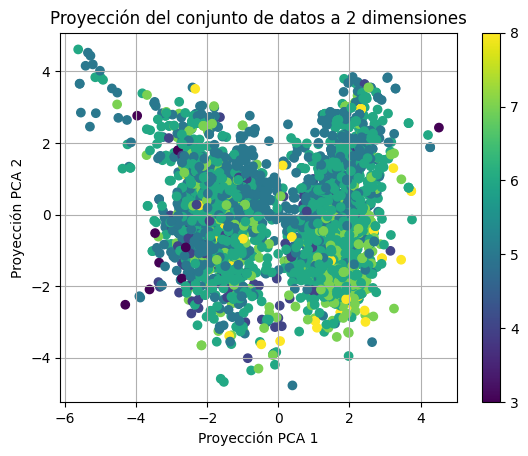

In [38]:
plt.scatter(dataset_pca[:,0], dataset_pca[:,1], c=preprocessed_dataset["quality"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Habiendo identificado previamente cada tipo de vino en el grafico podemos concluir que, con los datos que tenemos, el tipo de vino no afecta a la calidad del mismo.

### Moscatel

#### PCA

In [250]:
#Para analizar PCA, descartamos las columnas con variables cualitativas.
pca_moscatel_dataset=moscatel_dataset.drop(columns="quality")

In [251]:
#Analizamos el desvio de cada variable
pca_moscatel_dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1587.000000       1587.000000  1587.000000     1587.000000   
mean        6.531065          0.282335     0.304612        6.409924   
std         0.706696          0.099181     0.104944        4.842997   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.100000          0.220000     0.250000        1.900000   
50%         6.500000          0.270000     0.290000        5.300000   
75%         6.900000          0.330000     0.340000        9.800000   
max         9.400000          1.100000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1587.000000          1587.000000           1587.000000  1587.000000   
mean      0.045269            34.940769            128.862319     0.993226   
std       0.020793            16.409145             37.122901     0.002897   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            102.500000     0.990910   
50%       0.043000            33.000000            124.000000     0.992750   
75%       0.050000            45.000000            153.500000     0.995400   
max       0.271000           124.000000            259.000000     0.999710   

                pH    sulphates      alcohol  
count  1587.000000  1587.000000  1587.000000  
mean      3.162098     0.490069    10.849439  
std       0.139806     0.112936     1.308437  
min       2.790000     0.230000     8.400000  
25%       3.070000     0.410000     9.700000  
50%       3.160000     0.480000    10.800000  
75%       3.250000     0.550000    11.900000  
max       3.760000     1.080000    14.200000

Los desvíos son muy distintos (p.e. total sulfur dioxide y volatile acidity), por lo tanto las varianzas también. Tenemos que estandarizar.

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# estandarizamos X
scaler = StandardScaler()
moscatel_scaled = scaler.fit_transform(pca_moscatel_dataset)

print(np.std(moscatel_scaled, axis=0))

NameError: name 'pca_moscatel_dataset' is not defined

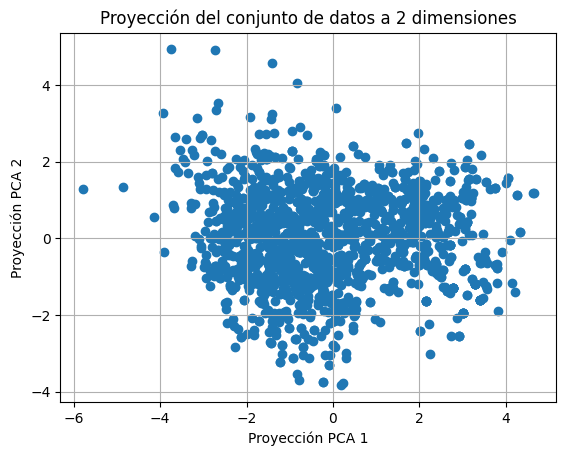

In [253]:
# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
moscatel_pca = pca.fit_transform(moscatel_scaled)
# graficamos los datos
plt.scatter(moscatel_pca[:,0], moscatel_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

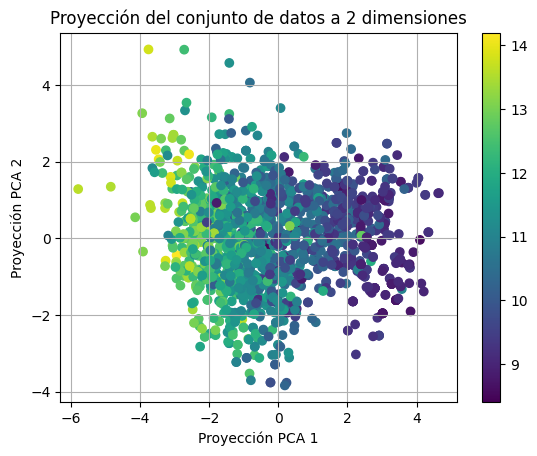

In [254]:
plt.scatter(moscatel_pca[:,0], moscatel_pca[:,1], c=moscatel_dataset["alcohol"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

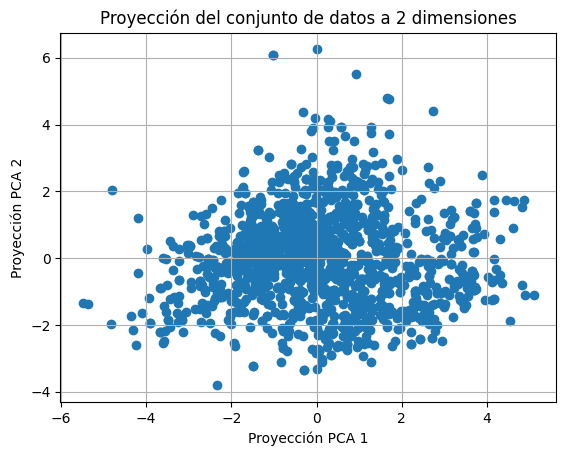

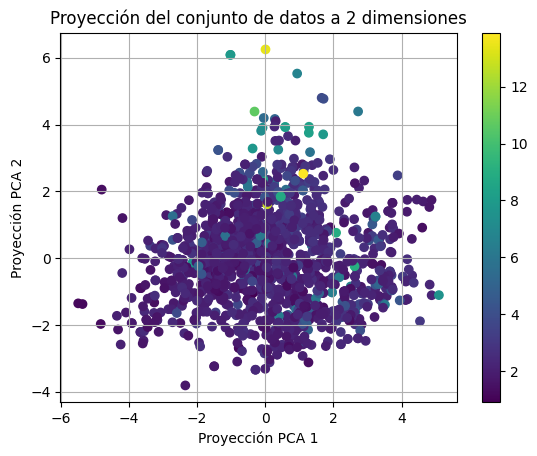

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Para analizar PCA, descartamos las columnas con variables cualitativas.
pca_syrah_dataset=syrah_dataset.drop(columns="quality")

# estandarizamos X
scaler = StandardScaler()
syrah_scaled = scaler.fit_transform(pca_syrah_dataset)

# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
syrah_pca = pca.fit_transform(syrah_scaled)
# graficamos los datos
plt.scatter(syrah_pca[:,0], syrah_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

plt.scatter(syrah_pca[:,0], syrah_pca[:,1], c=syrah_dataset["residual sugar"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

#### TSNE

In [256]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
moscatel_tsne = TSNE(n_components=2, random_state=10).fit_transform(moscatel_scaled) 
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(moscatel_scaled.shape))
print('After t-SNE: {}'.format(moscatel_tsne.shape))

Before t-SNE: (1587, 11)
After t-SNE: (1587, 2)


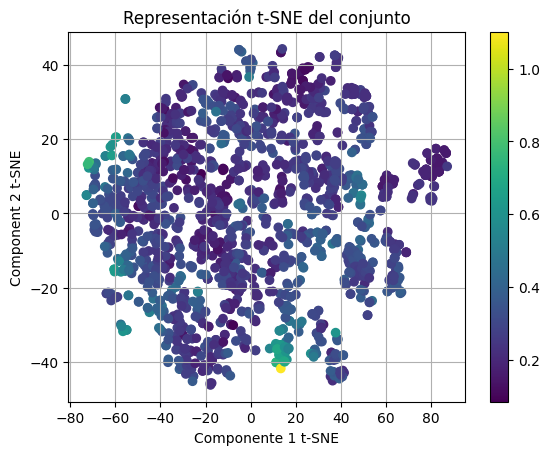

In [257]:
# graficamos los datos, el color de cada punto representa la acidez volatil
plt.scatter(moscatel_tsne[:,0], moscatel_tsne[:,1], c=moscatel_dataset["volatile acidity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

In [258]:
"""# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(preprocessed_dataset_scaled) 
preprocessed_dataset["type"]=preprocessed_dataset["type"].map({"Moscatel" : 0 , "Syrah" : 1})

# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(preprocessed_dataset_scaled.shape))
print('After t-SNE: {}'.format(X_tsne.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["type"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()"""

'# importamos el t-SNE\nfrom sklearn.manifold import TSNE\n\n# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos\nX_tsne = TSNE(n_components=2, random_state=10).fit_transform(preprocessed_dataset_scaled) \npreprocessed_dataset["type"]=preprocessed_dataset["type"].map({"Moscatel" : 0 , "Syrah" : 1})\n\n# imprimimos los tamaños antes y después\nprint(\'Before t-SNE: {}\'.format(preprocessed_dataset_scaled.shape))\nprint(\'After t-SNE: {}\'.format(X_tsne.shape))\n\n# graficamos los datos, el color de cada punto representa el valor de la casa\nplt.scatter(X_tsne[:,0], X_tsne[:,1], c=preprocessed_dataset["type"], cmap=\'viridis\')\nplt.grid(True)\nplt.xlabel(\'Componente 1 t-SNE\')\nplt.ylabel(\'Component 2 t-SNE\')\nplt.title(\'Representación t-SNE del conjunto\')\nplt.colorbar()\nplt.show()'

#### UMAP

In [259]:
# importamos umap
import umap.umap_ as umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
moscatel_umap = umap.UMAP(n_components=2).fit_transform(moscatel_scaled)
# imprimimos los tamaños antes y después
print('Antes de UMAP: {}'.format(moscatel_scaled.shape))
print('Después de UMAP: {}'.format(moscatel_umap.shape))

Antes de UMAP: (1587, 11)
Después de UMAP: (1587, 2)


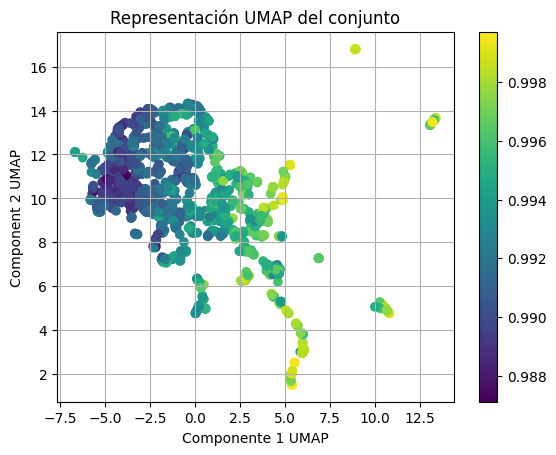

In [260]:
# graficamos los datos, el color de cada punto representa la densidad del vino
plt.scatter(moscatel_umap[:,0], moscatel_umap[:,1], c=moscatel_dataset["density"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()

## Clustering

### General por calidad

In [46]:
from sklearn.cluster import KMeans

# separamos las features de las calidades
calidades = preprocessed_dataset['quality'].map({3 : "Baja calidad" , 4 : "Baja calidad" ,5 : "Media calidad" ,6 : "Media calidad" ,7 : "Alta calidad" ,8 : "Alta calidad"})
clst_dataset = preprocessed_dataset.drop(columns=['quality', 'type'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(clst_dataset)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(clst_dataset)
print(clusters_kmeans)

[1 2 1 ... 0 0 0]


In [47]:
cluster_df = pd.DataFrame({'quality': calidades, 'Cluster': clusters_kmeans})

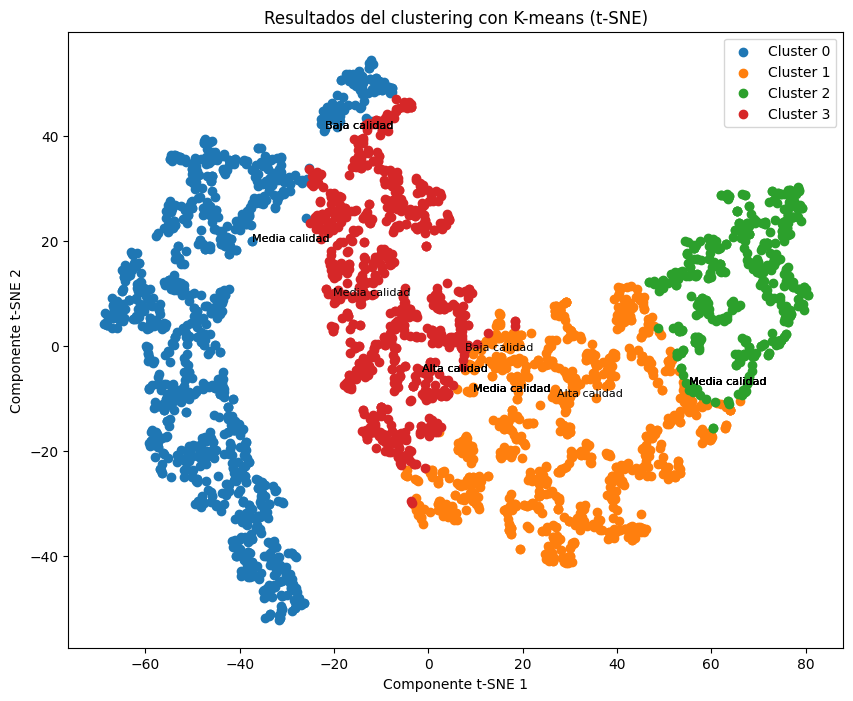

In [48]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(clst_dataset)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'quality': calidades})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  calidades_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['quality'].tolist()
  calidades_to_label = calidades_to_label[:5]

  for c in calidades_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['quality'] == c)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], c, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

### General por tipo

In [49]:
from sklearn.cluster import KMeans

# separamos las features del tipo
tipos = preprocessed_dataset['type']
clst_dataset = preprocessed_dataset.drop(columns=['quality', 'type'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(clst_dataset)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(clst_dataset)
print(clusters_kmeans)

[1 2 1 ... 0 0 0]


In [50]:
cluster_df = pd.DataFrame({'type': tipos, 'Cluster': clusters_kmeans})

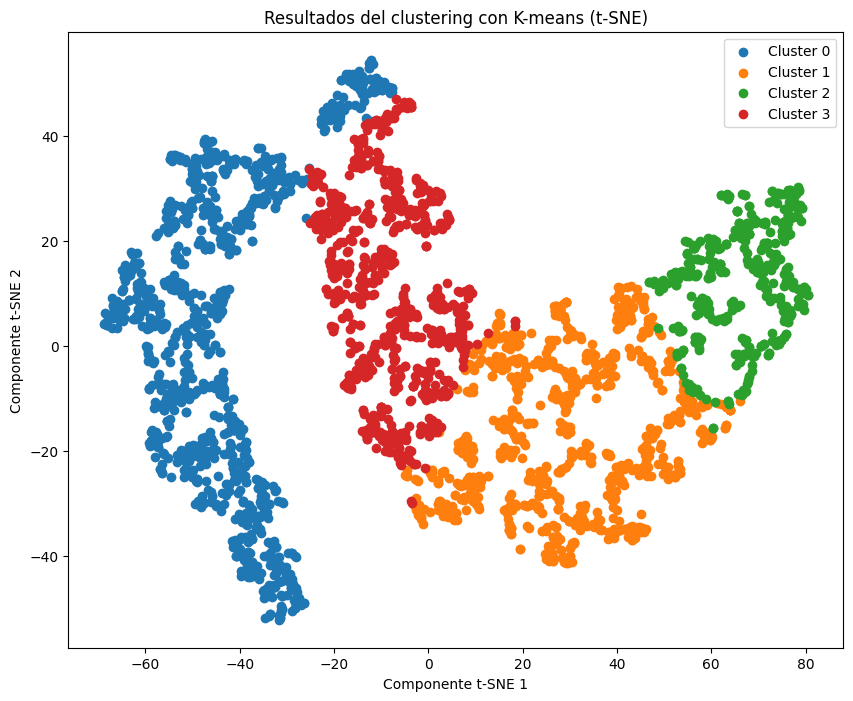

In [51]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(clst_dataset)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'type': tipos})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 para en cada cluster
  type_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['type'].tolist()
  type_to_label = calidades_to_label[:5]

  for c in type_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['type'] == c)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], c, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

### Moscatel

In [261]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

moscatel_dataset_n=moscatel_dataset.copy()

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = moscatel_dataset_n.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
moscatel_dataset_n[numeric_cols] = scaler.fit_transform(moscatel_dataset_n[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
moscatel_dataset_n.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.767857          0.152709         0.32        0.447489   0.080153   
1       0.357143          0.142857         0.20        0.059361   0.129771   
2       0.660714          0.241379         0.36        0.086758   0.160305   
3       0.500000          0.290640         0.36        0.388128   0.198473   
4       0.464286          0.064039         0.29        0.050228   0.133588   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.262295                 0.384  0.552381  0.329897   0.223529   
1             0.303279                 0.580  0.408730  0.432990   0.188235   
2             0.196721                 0.468  0.306349  0.546392   0.352941   
3             0.327869                 0.820  0.832540  0.536082   0.388235   
4             0.155738                 0.424  0.361111  0.319588   0.176471   

    alcohol  quality  
0  0.586207      0.6  
1  0.310345      0.6  
2  0.741379      0.6  
3  0.172414      0.4  
4  0.310345      0.4

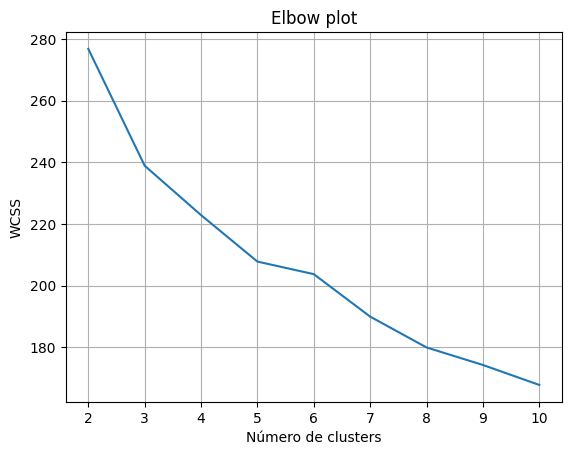

In [262]:
from sklearn.cluster import KMeans

muestras_mds = moscatel_dataset_n.drop(columns=['quality'])
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(muestras_mds)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# separamos las variables de las calidades
calidades = moscatel_dataset_n['quality']
muestras_mds = moscatel_dataset_n.drop(columns=['quality'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=8, verbose=0, random_state=100)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(muestras_mds)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(muestras_mds)
print(clusters_kmeans)

[7 4 5 ... 3 5 0]


In [ ]:
import pandas as pd

# Creamos un DataFrame con las calidades y los clusters asignados
cluster_df = pd.DataFrame({'quality': calidades, 'Cluster': clusters_kmeans})

# Imprimimos las calidades de cada cluster
for cluster_num in range(8):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['quality'].tolist())


Cluster 0:
[0.6000000000000001, 0.3999999999999999, 1.0, 0.8, 0.3999999999999999, 1.0, 0.8, 0.8, 0.8, 0.6000000000000001, 0.8, 0.6000000000000001, 0.6000000000000001, 0.8, 0.6000000000000001, 0.6000000000000001, 0.8, 0.6000000000000001, 0.6000000000000001, 0.3999999999999999, 0.6000000000000001, 0.6000000000000001, 0.8, 0.8, 0.8, 0.6000000000000001, 1.0, 1.0, 0.8, 0.8, 1.0, 0.6000000000000001, 0.6000000000000001, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.19999999999999996, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.6000000000000001, 0.19999999999999996, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6000000000000001, 0.6000000000000001, 0.3999999999999999, 0.6000000000000001, 0.8, 0.3999999999999999, 0.8, 0.8, 0.8, 0.8, 1.0, 0.6000000000000001, 0.6000000000000001, 0.3999999999999999, 0.8, 0.3999999999999999, 0.6000000000000001, 0.6000000000000001, 0.6000000000000

In [265]:
for idx, val in calidades.value_counts().sort_index().items():
    print(idx,val)

0.0 3
0.19999999999999996 39
0.3999999999999999 410
0.6000000000000001 792
0.8 293
1.0 50


c:\Users\usuario\Documents\Facultad\CsDatos\TPE - Hermida_Russo_Velis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


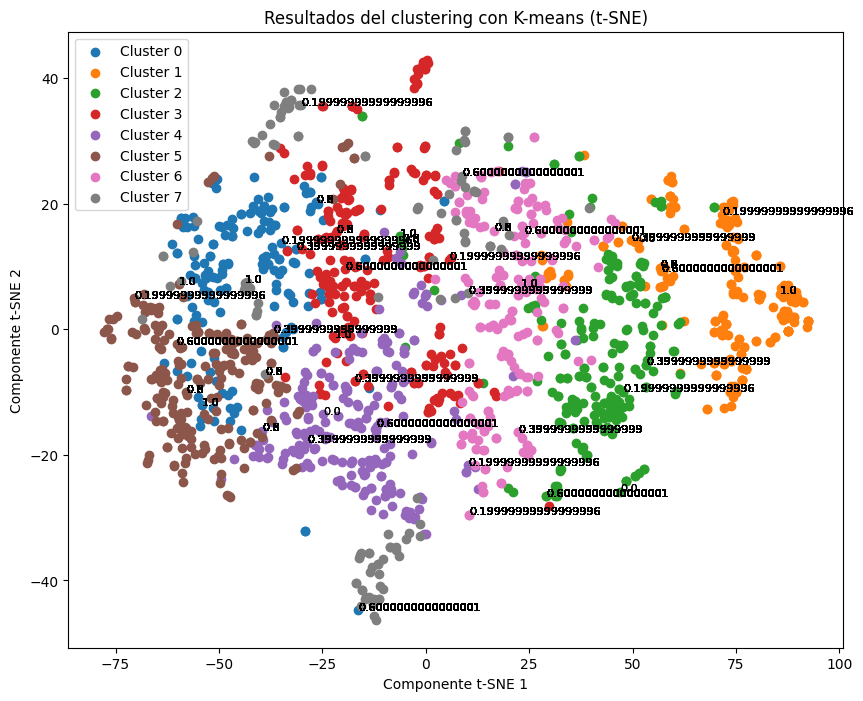

In [266]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(muestras_mds)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'quality': calidades})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(8):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')
  for c in calidades:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['quality'] == c)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], c, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()


Realizamos K-Means para hacer clustering. La única variable que podíamos utilizar para 

In [267]:
t_moscatel_dataset=moscatel_dataset.drop_duplicates(["density"])

In [268]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

moscatel_dataset_tn=t_moscatel_dataset.copy()

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = moscatel_dataset_tn.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler a los datos y transformamos los datos
moscatel_dataset_tn[numeric_cols] = scaler.fit_transform(moscatel_dataset_tn[numeric_cols])

# Imprimimos el DataFrame con los datos normalizados
moscatel_dataset_tn.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           0.74          0.233083     0.372093        0.444954   0.105528   
1           0.28          0.218045     0.232558        0.055046   0.170854   
2           0.62          0.368421     0.418605        0.082569   0.211055   
3           0.44          0.443609     0.418605        0.385321   0.261307   
4           0.40          0.097744     0.337209        0.045872   0.175879   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.262295              0.396694  0.552381  0.345238   0.253333   
1             0.303279              0.599174  0.408730  0.464286   0.213333   
2             0.196721              0.483471  0.306349  0.595238   0.400000   
3             0.327869              0.847107  0.832540  0.583333   0.440000   
4             0.155738              0.438017  0.361111  0.333333   0.200000   

    alcohol  quality  
0  0.586207      0.6  
1  0.310345      0.6  
2  0.741379      0.6  
3  0.172414      0.4  
4  0.310345      0.4

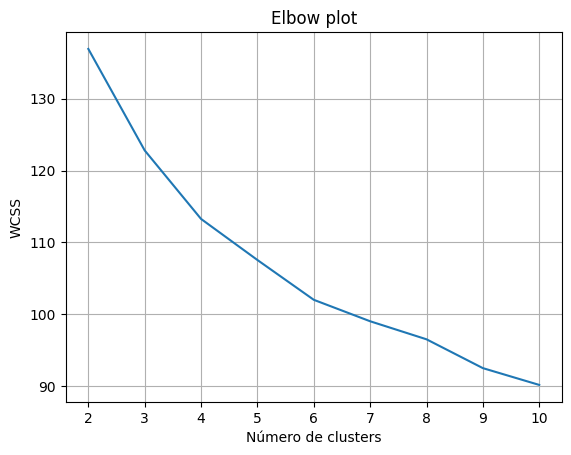

In [269]:
from sklearn.cluster import KMeans

muestras_mds = moscatel_dataset_tn.drop(columns=['density'])
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(muestras_mds)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [270]:
from sklearn.cluster import KMeans

# separamos las features de los nombres de los países
densidades = moscatel_dataset_tn['density']
muestras_mds = moscatel_dataset_tn.drop(columns=['density'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=4, verbose=0, random_state=100)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(muestras_mds)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(muestras_mds)
print(clusters_kmeans)

[3 2 0 1 2 0 3 0 2 0 0 3 0 2 2 3 3 3 1 3 0 1 3 2 1 0 3 3 0 0 0 1 1 0 0 0 0
 1 0 0 2 0 2 1 0 0 3 3 0 2 0 2 1 1 0 2 3 1 3 3 0 2 1 1 1 2 2 3 0 3 3 0 1 0
 3 0 3 3 0 2 3 2 0 2 2 3 0 1 0 3 2 2 3 3 0 3 0 3 3 1 1 1 2 2 2 3 3 3 0 2 1
 3 2 1 1 0 1 3 0 0 1 1 2 1 3 0 3 0 3 1 3 0 0 1 2 3 2 0 3 2 0 0 1 1 0 0 1 1
 0 2 2 1 2 0 0 3 3 3 3 0 2 0 2 0 1 0 0 2 1 1 0 3 3 0 0 0 3 0 1 0 3 3 0 1 1
 3 1 3 2 3 3 3 2 1 3 2 0 3 3 3 3 3 3 2 3 3 3 0 0 3 0 0 2 3 0 3 1 0 1 1 0 1
 1 1 1 1 2 0 2 1 3 3 0 2 2 0 3 1 2 2 1 2 0 0 2 0 1 3 0 1 0 0 0 3 0 2 3 2 1
 1 3 0 1 2 0 1 1 3 2 3 1 0 2 2 0 2 1 0 1 1 2 2 2 2 0 3 1 3 0 0 0 3 1 1 1 1
 1 1 1 1 3 3 1 1 1 0 1 0 3 1 2 3 3 1 3 1 0 0 0 0 2 0 1 1 1 0 0 3 1 1 1 3 1
 1 3 2 3 2 1 3 0 0 0 3 0 3 1 3 3 2 1 3 0 0 3 3 1 2 2 1 2 0 2 1 3 1 1 1 0 3
 2 1 2 2 1 2 3 0 2 0 0 1 2 1 2 2 2 1 2 2 2 1 1 3 1 3 0 0 3 2 1 1 1 2 1 3 2
 2 2 2 1 0 2 1 3 2 1 2 3 3 1 0 1 1 1 0 2 2 1 0 1 2 1 2 2 1 1 0 1 1 1 0 0 3
 2 2 1 0 1 3 1 0 3 0 0 2 3 3 0 3 3 0 1 1 2 1 0 0 1 2 1 2 1 2 2 3 1 1 0 0 2
 1 2 2 3 3 0 0 1 1 1 1 1 

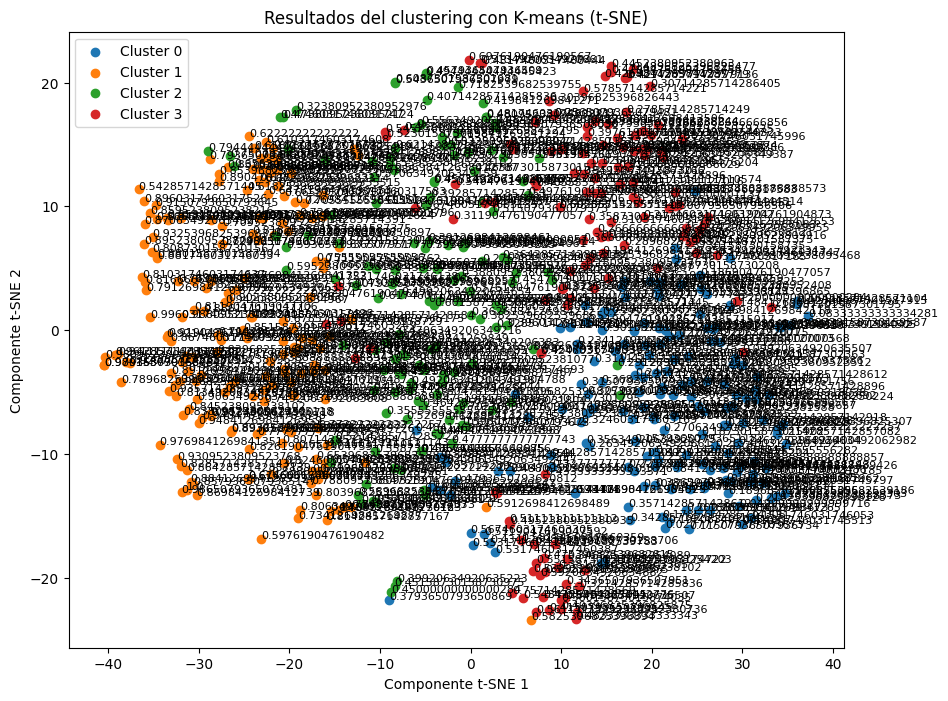

In [271]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'density': densidades, 'Cluster': clusters_kmeans})

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(muestras_mds)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'density': densidades})


# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(4):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')
  for c in densidades:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['density'] == c)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], c, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

# Validando hipótesis

## Los vinos con mayor azúcar residual tienen mayores puntuaciones.

### General

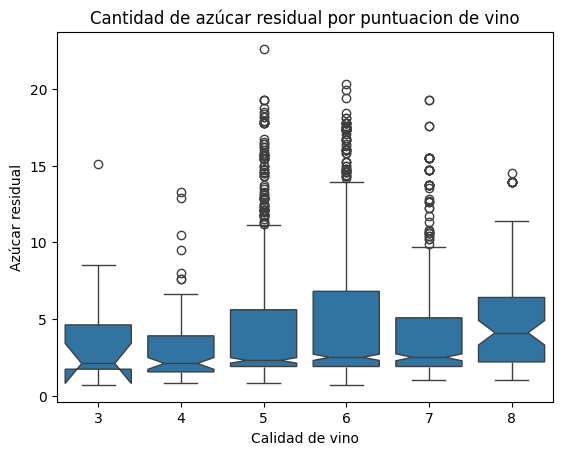

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='quality', y='residual sugar', data=preprocessed_dataset, notch=True)
plt.title("Cantidad de azúcar residual por puntuacion de vino")
plt.xlabel("Calidad de vino")
plt.ylabel("Azúcar residual")
plt.show()

In [73]:
cant=preprocessed_dataset[preprocessed_dataset["quality"]==3].shape[0] 

print(cant)

12


Como vemos, tenemos el problema del vestido para el boxplot de "3". Esto se debe al outlier y la poca cantidad de muestras con ese valor de calidad. Para solucionar esto, vamos a reagrupar las muestras en tres: "Baja calidad" (0), "Media calidad" (1) y "Alta calidad" (2).

In [ ]:
dataset_aux=preprocessed_dataset.copy()
dataset_aux["quality"]=dataset_aux["quality"].map({3 : 0 , 4 : 0 , 5 : 1 , 6 : 1 , 7 : 2 , 8 : 2})

C:\Users\usuario\AppData\Local\Temp\ipykernel_22264\1725020748.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='residual sugar', data=dataset_aux, notch=True, palette=hex_colors)


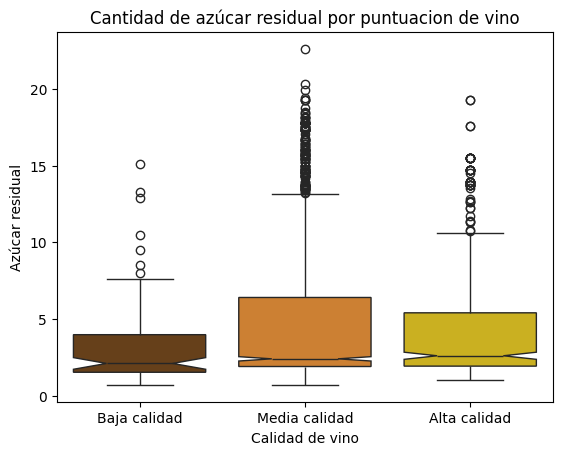

In [210]:
hex_colors = ["#73400d", "#E68019", "#E6C305"]
sns.boxplot(x='quality', y='residual sugar', data=dataset_aux, notch=True, palette=hex_colors)
plt.title("Cantidad de azúcar residual por puntuacion de vino")
plt.xlabel("Calidad de vino")
plt.xticks(ticks=[0, 1, 2], labels=["Baja calidad", "Media calidad","Alta calidad"])
plt.ylabel("Azúcar residual")
plt.show()

Podemos ver que hay superposicion de acogotamientos, lo cual es un mal indicio para que nuestra hipotesis resulte verdadera. Ya que nos puede estar diciendo que no hay diferencias significativas entre los grupos.

Como no son grupos apareados, vamos a utilizar el test t. Para utilizar este test primero debemos validar normalidad de los datos.

#### Normalidad

In [76]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos
baja_calidad = dataset_aux[dataset_aux['quality'] == 0]['residual sugar']
media_calidad = dataset_aux[dataset_aux['quality'] == 1]['residual sugar']
alta_calidad = dataset_aux[dataset_aux['quality'] == 2]['residual sugar']

# Test de Shapiro-Wilk para vinos de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de baja calidad: Estadístico=0.745, p-valor=0.000
Test de Shapiro-Wilk para vinos de media calidad: Estadístico=0.752, p-valor=0.000
Test de Shapiro-Wilk para vinos de alta calidad: Estadístico=0.761, p-valor=0.000


In [ ]:
from scipy.stats import kstest

# Test de Kolmogorov-Smirnov para vinos de baja calidad
stat, p = kstest(baja_calidad, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Kolmogorov-Smirnov para vinos de media calidad
stat, p = kstest(media_calidad, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = kstest(alta_calidad, 'norm')
print(f"Test de Kolmogorov-Smirnov para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Kolmogorov-Smirnov para vinos de baja calidad: Estadístico=0.806, p-valor=0.000
Test de Kolmogorov-Smirnov para vinos de media calidad: Estadístico=0.854, p-valor=0.000
Test de Kolmogorov-Smirnov para vinos de alta calidad: Estadístico=0.853, p-valor=0.000


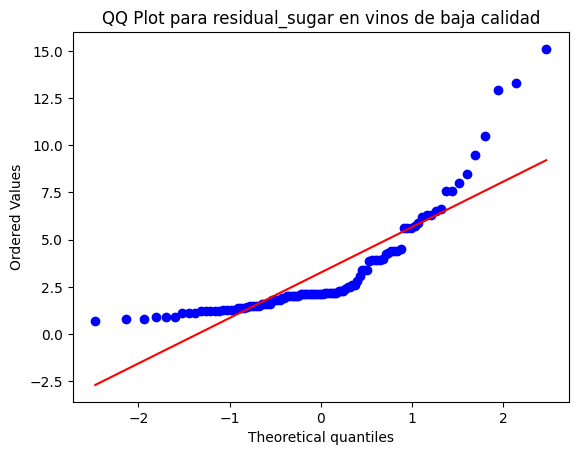

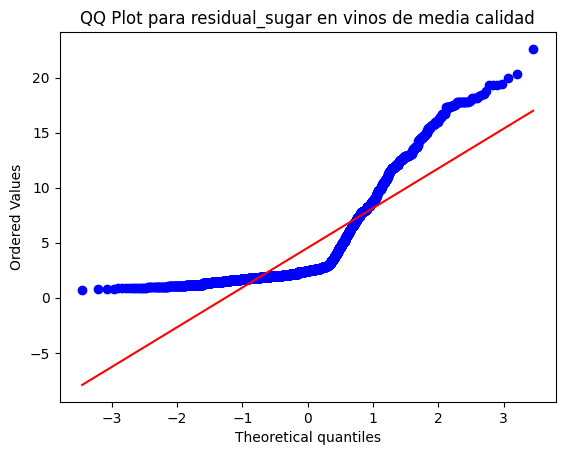

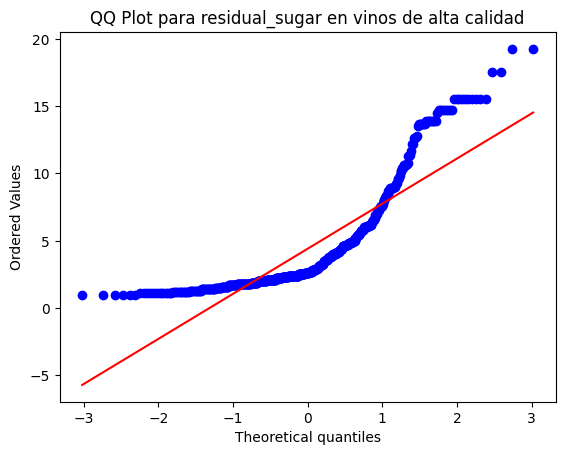

In [78]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para vinos de baja calidad
stats.probplot(baja_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para residual_sugar en vinos de baja calidad")
plt.show()

# QQ plot para vinos de media calidad
stats.probplot(media_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para residual_sugar en vinos de media calidad")
plt.show()

# QQ plot  para vinos de alta calidad
stats.probplot(alta_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para residual_sugar en vinos de alta calidad")
plt.show()

Ni los dos test ni el QQ plot nos están mostrando normalidad en los datos así que no podemos utilizar el test t. Validamos la homocedasticidad con Levene.

In [79]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para residual_sugar: Estadístico=4.225, p-valor=0.015


Los datos no son homocedasticos. Dado que nuestro conjunto no cumple con ninguno de los supuestos que se necesitan para realizar la comparación de estos grupos, vamos a recurrir al test Kruskal-Wallis.

In [80]:
# Test de Kruskal-Wallis para comparar azucar residual entre vinos de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")

Test de Kruskal-Wallis para residual_sugar: Estadístico=12.322, p-valor=0.002
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.


Según el resultado del test, podemos concluir que las preferencias de los consumidores por los vinos no se basan en la dulzura de los mismos.

Segun el experto (ChatGPT), los vinos Moscatel son más dulces que los Syrah. Por lo que vale la pena realizar un análisis por separado.

### Moscatel

In [68]:
#reajuste de la columna quality para el dataset Moscatel
moscatel_aux=moscatel_dataset.copy()
moscatel_aux["quality"]=moscatel_aux["quality"].map({3 : 0 , 4 : 0 , 5 : 1 , 6 : 1 , 7 : 2 , 8 : 2})

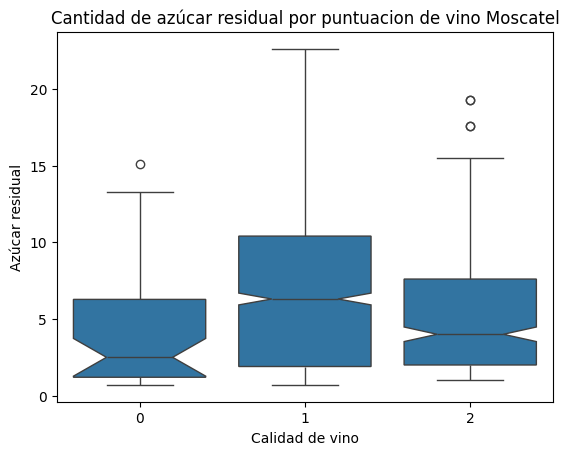

In [82]:
sns.boxplot(x='quality', y='residual sugar', data=moscatel_aux, notch=True)
plt.title("Cantidad de azúcar residual por puntuacion de vino Moscatel")
plt.xlabel("Calidad de vino")
plt.ylabel("Azúcar residual")
plt.show()

En el gráfico, se puede ver que la situación cambia ya que a diferencia del análisis anterior, los acogotamientos no se superponen. Lo que puede indicar posibles diferencias significativas entre los grupos. 

In [83]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos
baja_calidad = moscatel_aux[moscatel_aux['quality'] == 0]['residual sugar']
media_calidad = moscatel_aux[moscatel_aux['quality'] == 1]['residual sugar']
alta_calidad = moscatel_aux[moscatel_aux['quality'] == 2]['residual sugar']

# Test de Shapiro-Wilk para vinos de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de baja calidad: Estadístico=0.839, p-valor=0.000
Test de Shapiro-Wilk para vinos de media calidad: Estadístico=0.917, p-valor=0.000
Test de Shapiro-Wilk para vinos de alta calidad: Estadístico=0.850, p-valor=0.000


In [84]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para residual_sugar: Estadístico=16.746, p-valor=0.000


In [85]:
# Test de Kruskal-Wallis para comparar azucar residual entre vinos de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")

Test de Kruskal-Wallis para residual_sugar: Estadístico=26.465, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.


### Syrah

Mismo análisis, ahora con los vinos Syrah.

In [151]:
#reajuste de la columna quality para el dataset Moscatel
syrah_aux=syrah_dataset.copy()
syrah_aux["quality"]=syrah_aux["quality"].map({3 : 0 , 4 : 0 , 5 : 1 , 6 : 1 , 7 : 2 , 8 : 2})

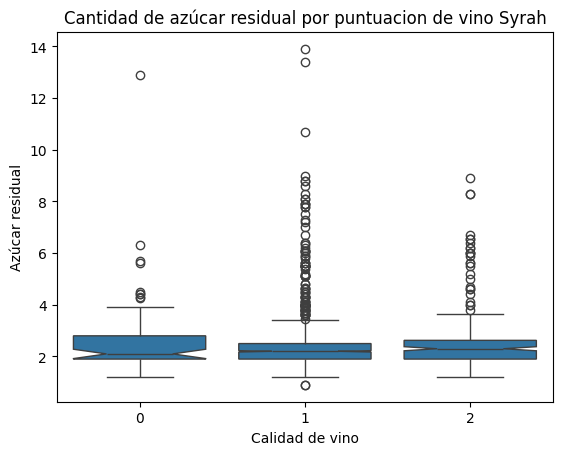

In [87]:
sns.boxplot(x='quality', y='residual sugar', data=syrah_aux, notch=True)
plt.title("Cantidad de azúcar residual por puntuacion de vino Syrah")
plt.xlabel("Calidad de vino")
plt.ylabel("Azúcar residual")
plt.show()

Los acogotamientos se superponen de manera similar al gráfico realizado con todos los vinos juntos. Esto podría indicar que no hay diferencias significativas entre los grupos.

In [88]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos
baja_calidad = syrah_aux[syrah_aux['quality'] == 0]['residual sugar']
media_calidad = syrah_aux[syrah_aux['quality'] == 1]['residual sugar']
alta_calidad = syrah_aux[syrah_aux['quality'] == 2]['residual sugar']

# Test de Shapiro-Wilk para vinos de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de baja calidad: Estadístico=0.619, p-valor=0.000
Test de Shapiro-Wilk para vinos de media calidad: Estadístico=0.600, p-valor=0.000
Test de Shapiro-Wilk para vinos de alta calidad: Estadístico=0.702, p-valor=0.000


In [89]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para residual_sugar: Estadístico=5.458, p-valor=0.004


In [90]:
# Test de Kruskal-Wallis para comparar azucar residual entre vinos de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")

Test de Kruskal-Wallis para residual_sugar: Estadístico=5.872, p-valor=0.053
No hay suficiente evidencia para rechazar la hipótesis nula.
Existe una diferencia significativa en el residual_sugar entre vinos de diferente calidad.


Nuestro p valor nos habilita a afirmar que sí existe una diferencia significativa en el azúcar residual entre los vinos de diferente calidad. Aún así consideramos que es un p valor demasiado cercano al nivel de significancia por lo que rechazamos la hipotesis nula. En este caso los que más tienen son los de menor calidad.

## Los vinos Syrah tienen más alcohol que los vinos Moscatel

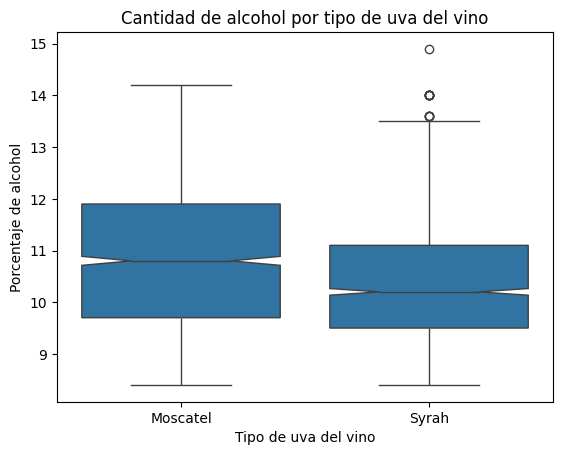

In [91]:
sns.boxplot(x='type', y='alcohol', data=preprocessed_dataset, notch=True)
plt.title("Cantidad de alcohol por tipo de uva del vino")
plt.xlabel("Tipo de uva del vino")
#plt.xticks(ticks=[0, 1], labels=["En vías de desarrollo", "Desarrollado"])
plt.ylabel("Porcentaje de alcohol")
plt.show()

Vemos por los acogotamientos de ese boxplot que puede haber diferencias significativas estadísticamente. Para realizar un test t, debemos validar normalidad. Utilizaremos Sharpiro-Wills.

In [92]:
from scipy.stats import shapiro

# Separamos los datos en dos
syrah_alcohol = preprocessed_dataset[preprocessed_dataset['type'] == "Syrah"]['alcohol']
moscatel_alcohol = preprocessed_dataset[preprocessed_dataset['type'] == "Moscatel"]['alcohol']

# Test de Shapiro-Wilk para vinos Syrah
stat, p = shapiro(syrah_alcohol)
print(f"Test de Shapiro-Wilk para vinos Syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel
stat, p = shapiro(moscatel_alcohol)
print(f"Test de Shapiro-Wilk para vinos Moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah: Estadístico=0.928, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel: Estadístico=0.967, p-valor=0.000


Validamos homocedasticidad con Levene.

In [93]:
stat, p = stats.levene(syrah_alcohol, moscatel_alcohol)
print(f"Test de Levene para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para alcohol: Estadístico=101.325, p-valor=0.000


Los datos no son homocedasticos. Dado que nuestro conjunto no cumple con ninguno de los supuestos que se necesitan para realizar la comparación de estos grupos, vamos a recurrir al test Kruskal-Wallis.

In [94]:
# Test de Kruskal-Wallis para comparar alcohol entre vinos de diferente uva.
stat, p = stats.kruskal(syrah_alcohol, moscatel_alcohol)
print(f"Test de Kruskal-Wallis para alcohol: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.")

Test de Kruskal-Wallis para alcohol: Estadístico=73.351, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el porcenteaje de alcohol entre vinos Syrah y Moscatel.


## Los vinos Moscatel se conservan mejor que los Syrah.

Consideramos que un vino se conserva mejor si tiene mayores cantidades de azúcar residual, mayor acidez no volatil, un pH bajo, sulfatos bajos y alto porcentaje de alcohol. Para poder realizar un análisis vamos a intentar resumir estas cinco variables a una utilizando PCA.

In [292]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Para analizar PCA, descartamos las columnas que no nos interesan.
syrah_conservacion=syrah_dataset.drop(columns={"volatile acidity","citric acid","chlorides","free sulfur dioxide","total sulfur dioxide","density","sulphates","quality"})

# estandarizamos hip3
scaler = StandardScaler()
conservacion_scaled = scaler.fit_transform(syrah_conservacion)

# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=1)
pca_syrah = pca.fit_transform(conservacion_scaled)
print(pca.explained_variance_ratio_)

[0.43127555]


In [293]:
#Para analizar PCA, descartamos las columnas que no nos interesan.
moscatel_conservacion=moscatel_dataset.drop(columns={"volatile acidity","citric acid","chlorides","free sulfur dioxide","total sulfur dioxide","density","sulphates","quality"})

# estandarizamos hip3
scaler = StandardScaler()
conservacion_scaled = scaler.fit_transform(moscatel_conservacion)

# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=1)
pca_moscatel = pca.fit_transform(conservacion_scaled)
print(pca.explained_variance_ratio_)

[0.4720112]


In [ ]:
import matplotlib.pyplot as plt

# Aplanamos los arrays a una dimensión
pca_syrah_flat = pca_syrah.ravel()
pca_moscatel_flat = pca_moscatel.ravel()

# Graficamos el boxplot
sns.boxplot(labels=["Syrah", "Moscatel"],y=[pca_syrah_flat,pca_moscatel_flat], notch=True)
plt.ylabel("Primer Componente Principal (PCA)")
plt.title("Comparación de Conservación entre Syrah y Moscatel")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [125]:
cuartil_75_alcohol = preprocessed_dataset['alcohol'].quantile(0.75)

# Filtramos el DataFrame para obtener solo los valores que están en el cuartil más alto
c_alcohol = preprocessed_dataset[preprocessed_dataset['alcohol'] > cuartil_75_alcohol]


In [126]:
cuartil_25_pH = preprocessed_dataset['pH'].quantile(0.25)

# Filtramos el DataFrame para obtener solo los valores que están en el cuartil más bajo
c_pH = preprocessed_dataset[preprocessed_dataset['pH'] > cuartil_25_pH]

In [127]:
cuartil_75_fixAcidity = preprocessed_dataset['fixed acidity'].quantile(0.75)

# Filtramos el DataFrame para obtener solo los valores que están en el cuartil más alto
c_fixAcidity = preprocessed_dataset[preprocessed_dataset['fixed acidity'] > cuartil_75_fixAcidity]

In [128]:
cuartil_25_sulphates=preprocessed_dataset['sulphates'].quantile(0.25)
c_sulphates=preprocessed_dataset[preprocessed_dataset['sulphates']>cuartil_25_sulphates]

In [129]:
cuartil_75_resiSugar=preprocessed_dataset['residual sugar'].quantile(0.75)
c_resiSugar=preprocessed_dataset[preprocessed_dataset['residual sugar']>cuartil_75_resiSugar]

In [137]:
# Identificamos los vinos que cumplen con cada cuartil en listas de índices
indices_c_alcohol = set(c_alcohol.index)
indices_c_pH = set(c_pH.index)
indices_c_fixAcidity = set(c_fixAcidity.index)
indices_c_sulphates = set(c_sulphates.index)
indices_c_resiSugar = set(c_resiSugar.index)

# Condición 1: Vinos que cumplen con todas las 5 condiciones
indices_5_de_5 = indices_c_alcohol & indices_c_pH & indices_c_fixAcidity & indices_c_sulphates & indices_c_resiSugar
vinos_re_conservados = preprocessed_dataset.loc[list(indices_5_de_5)]

# Condición 2: Vinos que cumplen con 4 de las 5 condiciones
indices_4_de_5 = (
    (indices_c_alcohol & indices_c_pH & indices_c_fixAcidity & indices_c_sulphates) |
    (indices_c_alcohol & indices_c_pH & indices_c_fixAcidity & indices_c_resiSugar) |
    (indices_c_alcohol & indices_c_pH & indices_c_sulphates & indices_c_resiSugar) |
    (indices_c_alcohol & indices_c_fixAcidity & indices_c_sulphates & indices_c_resiSugar) |
    (indices_c_pH & indices_c_fixAcidity & indices_c_sulphates & indices_c_resiSugar)
) - indices_5_de_5  # Quitamos los que ya cumplen 5 de 5
vinos_medio_conservados = preprocessed_dataset.loc[list(indices_4_de_5)]

# Condición 3: Vinos que cumplen con 3 de las 5 condiciones
indices_3_de_5 = (
    (indices_c_alcohol & indices_c_pH & indices_c_fixAcidity) |
    (indices_c_alcohol & indices_c_pH & indices_c_sulphates) |
    (indices_c_alcohol & indices_c_pH & indices_c_resiSugar) |
    (indices_c_alcohol & indices_c_fixAcidity & indices_c_sulphates) |
    (indices_c_alcohol & indices_c_fixAcidity & indices_c_resiSugar) |
    (indices_c_alcohol & indices_c_sulphates & indices_c_resiSugar) |
    (indices_c_pH & indices_c_fixAcidity & indices_c_sulphates) |
    (indices_c_pH & indices_c_fixAcidity & indices_c_resiSugar) |
    (indices_c_pH & indices_c_sulphates & indices_c_resiSugar) |
    (indices_c_fixAcidity & indices_c_sulphates & indices_c_resiSugar)
) - indices_4_de_5 - indices_5_de_5  # Quitamos los que ya cumplen 4 o 5 de 5
vinos_poco_conservados = preprocessed_dataset.loc[list(indices_3_de_5)]

# Condición 4: Unión de los conjuntos anteriores (3, 4 o 5 de las 5 condiciones)
indices_union_3_4_5 = indices_5_de_5 | indices_4_de_5 | indices_3_de_5
vinos_conservados = preprocessed_dataset.loc[list(indices_union_3_4_5)]

# Opcional: ver el número de vinos en cada categoría
print(f"Vinos con 5 de 5 condiciones: {len(vinos_re_conservados)}")
print(f"Vinos con 4 de 5 condiciones: {len(vinos_medio_conservados)}")
print(f"Vinos con 3 de 5 condiciones: {len(vinos_poco_conservados)}")
print(f"Vinos en la unión de 3, 4 y 5 condiciones: {len(vinos_conservados)}")

Vinos con 5 de 5 condiciones: 7
Vinos con 4 de 5 condiciones: 141
Vinos con 3 de 5 condiciones: 1019
Vinos en la unión de 3, 4 y 5 condiciones: 1167


In [ ]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
moscatel_tsne = TSNE(n_components=2, random_state=10).fit_transform(moscatel_scaled) 
# imprimimos los tamaños antes y después
print('Before t-SNE: {}'.format(moscatel_scaled.shape))
print('After t-SNE: {}'.format(moscatel_tsne.shape))

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 3223
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1167 non-null   string 
 1   fixed acidity         1167 non-null   float64
 2   volatile acidity      1167 non-null   float64
 3   citric acid           1167 non-null   float64
 4   residual sugar        1167 non-null   float64
 5   chlorides             1167 non-null   float64
 6   free sulfur dioxide   1167 non-null   float64
 7   total sulfur dioxide  1167 non-null   float64
 8   density               1167 non-null   float64
 9   pH                    1167 non-null   float64
 10  sulphates             1167 non-null   float64
 11  alcohol               1167 non-null   float64
 12  quality               1167 non-null   int64  
dtypes: float64(11), int64(1), string(1)
memory usage: 127.6 KB


In [92]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos
syrah_hip3 = conservacion_pca_df[conservacion_pca_df['type'] == 1]['PCA_Conservacion']
moscatel_hip3 = conservacion_pca_df[conservacion_pca_df['type'] == 0]['PCA_Conservacion']

# Test de Shapiro-Wilk para vinos Syrah
stat, p = shapiro(syrah_hip3)
print(f"Test de Shapiro-Wilk para vinos Syrah: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel
stat, p = shapiro(moscatel_hip3)
print(f"Test de Shapiro-Wilk para vinos Moscatel: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah: Estadístico=0.946, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel: Estadístico=0.992, p-valor=0.000


In [93]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(syrah_hip3, moscatel_hip3)
print(f"Test de Levene para conservacion: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para conservacion: Estadístico=135.244, p-valor=0.000


In [94]:
# Test de Kruskal-Wallis para comparar conservacion entre vinos Syrah y Moscatel
stat, p = stats.kruskal(syrah_hip3, moscatel_hip3)
print(f"Test de Kruskal-Wallis para conservacion: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la conservacion de los vinos Syrah y Moscatel.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la conservacion de los vinos Syrah y Moscatel.")

Test de Kruskal-Wallis para conservacion: Estadístico=2331.660, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la conservacion de los vinos Syrah y Moscatel.


A diferencia de lo que esperabamos a partir del gráfico de boxplot, al realizar el test Kruskal-Wallis nos demostro que no podemos afirmar que un tipo de vino se conserva mejor que el otro. 

## Los vinos con mayor densidad tienen una mayor cantidad de azúcar residual.

En base a calcular la correlacion entre las variables densidad y azúcar residual en el dataset original, vemos que no da un valor de interes (0.2). Al hacer el calculo en los dataset obtenidos al separar el original por tipo, vemos que la correlacion en Moscatel da un valor alto de correlacion (0.8) y en Syrah uno bajo (0.38). Por lo tanto, planteamos esta hipótesis y vamos a realizarle un test.

Ajustaremos un modelo de regresión lineal simple para explicar la relacion entre estas dos variables.

In [274]:
import numpy as np
import statsmodels.api as sm

# Separamos nuestra variable independiente
X = preprocessed_dataset['residual sugar']
# y nuestra variable objetivo (variable dependiente)
y = preprocessed_dataset['density']

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     229.0
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           5.76e-50
Time:                        14:50:12   Log-Likelihood:                 13875.
No. Observations:                3113   AIC:                        -2.775e+04
Df Residuals:                    3111   BIC:                        -2.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9940   7.48e-05   1.33e

Como vemos, nuestro R^2 es bajísimo y no nos sirve para nada ya que el modelo no explica un porcentaje significativo de la varianza de densidad a partir de la variable residual sugar.

A continuacion, trabajaremos con los vinos separados por tipo para profundizar el análisis.

In [275]:
#Calculamos el coeficiente de correlacion entre densidad y azucar residual para los vinos Moscatel.
print(np.corrcoef(moscatel_dataset['density'], moscatel_dataset['residual sugar'])[0, 1])

0.8591757696109013


In [276]:
import numpy as np
import statsmodels.api as sm

# Separamos nuestra variable independiente
X = moscatel_dataset['residual sugar']
# y nuestra variable objetivo (variable dependiente)
y = moscatel_dataset['density']

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     4469.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:50:19   Log-Likelihood:                 8086.3
No. Observations:                1587   AIC:                        -1.617e+04
Df Residuals:                    1585   BIC:                        -1.616e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9899   6.18e-05    1.6e

Vemos que obtuvimos un R^2 de 0.738. Esto indica que el modelo explica aproximadamente el 73.8% de la varianza de density a partir de residual sigar. Esto sugiere que residual sugar es un predictor que puede andar bastante bien. 

El p-valor asociado a nuestro F estadístico es recontra bajo (p<0.001), lo que indica que el modelo en su conjunto es significativo. Esto implica que residual sugar es útil para predecir density con una confianza estadística alta.

In [277]:
#Recuperamos los residuales
model.resid

0      -0.001258
1       0.001301
2      -0.000298
3       0.002940
4       0.000804
          ...   
1627    0.000386
1628    0.000857
1629    0.001992
1630   -0.001807
1631   -0.000932
Length: 1587, dtype: float64

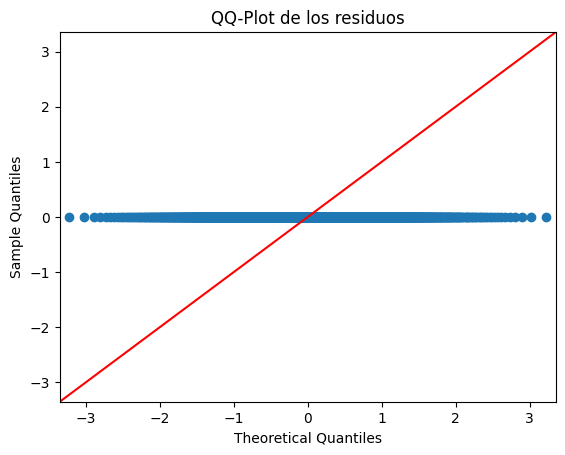

In [280]:
# QQ-Plot
sm.qqplot(model.resid, line='45')
plt.title("QQ-Plot de los residuos")
plt.show()

In [ ]:
from scipy.stats import shapiro

# aplicamos Shapiro-Wilk sobre los residuos
_, p = shapiro(model.resid)
print("p = %.4f" % (p))
# comparamos con el alpha
alpha = 0.05
if p > alpha:
    print("Se distribuyen normal (falló en rechazarse la hipótesis nula)")
else:
    print('No se distribuyen normal (se rechazó la hipótesis nula)')

p = 0.0000
No se distribuyen normal (se rechazó la hipótesis nula)


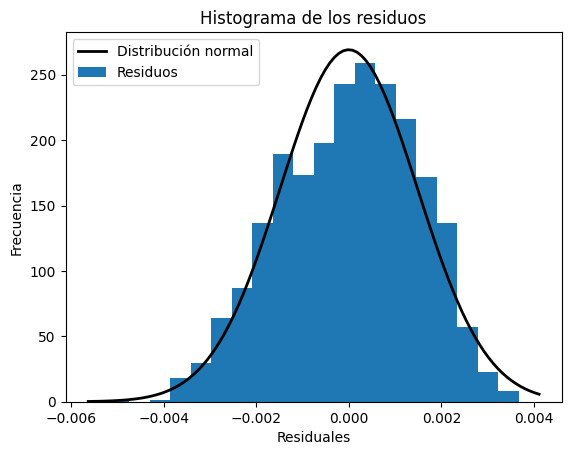

In [41]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import norm

# Histograma de residuos
plt.hist(model.resid, bins=20, density=True)
# Ajustamos una curva normal a esos residuos
mu, std = norm.fit(model.resid)
# Graficamos la curva de la distribución normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel("Residuales")
plt.ylabel("Frecuencia")
plt.title("Histograma de los residuos")
plt.legend(["Distribución normal", "Residuos"])
plt.show()

raaaro preguntar

In [213]:
import numpy as np
import statsmodels.api as sm

# Separamos nuestra variable independiente
X = moscatel_dataset['residual sugar']
# y nuestra variable objetivo (variable dependiente)
y = moscatel_dataset['density']*1000

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
# Imprimimos el resumen de los resultados
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     4469.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:07:14   Log-Likelihood:                -2876.3
No. Observations:                1587   AIC:                             5757.
Df Residuals:                    1585   BIC:                             5767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            989.9311      0.062    1.6e

In [49]:
import numpy as np
import statsmodels.api as sm

# Separamos nuestra variable independiente
X = syrah_dataset['residual sugar']
# y nuestra variable objetivo (variable dependiente)
y = syrah_dataset['density']

# Agregamos una constante como característica, para estimar la ordenada al origen
X = sm.add_constant(X)
# Ajustamos el modelo
model = sm.OLS(y, X).fit()
# Imprimimos el resumen de los resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     108.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.17e-24
Time:                        12:30:30   Log-Likelihood:                 7642.8
No. Observations:                1528   AIC:                        -1.528e+04
Df Residuals:                    1526   BIC:                        -1.527e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9957   9.59e-05   1.04e

## Los vinos Moscatel tienen mejor puntuacion que los Syrah.

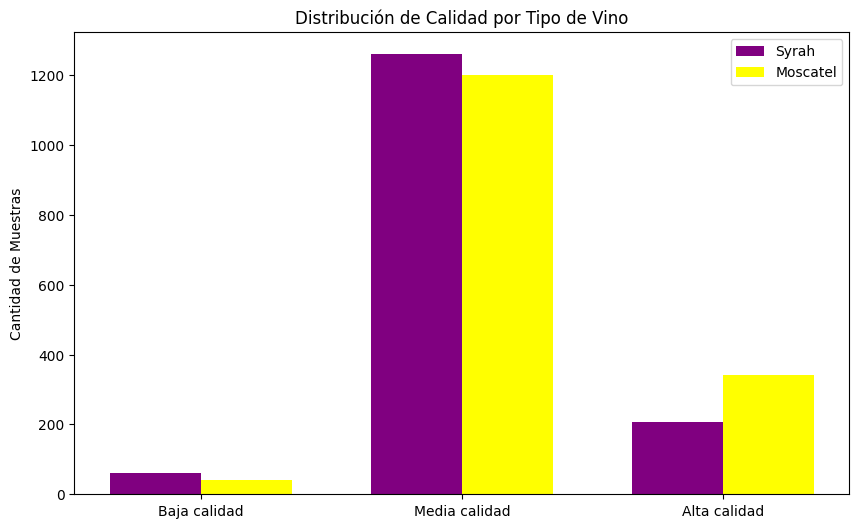

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tu dataframe se llama 'df'
# Agrupa los datos por tipo y calidad y cuenta las ocurrencias

df_grouped = dataset_aux.groupby(['quality', 'type']).size().unstack(fill_value=0)

# Configuración del gráfico
x = np.arange(len(df_grouped.index))  # posiciones en el eje X
width = 0.35  # ancho de las barras

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
bars_syrah = ax.bar(x - width/2, df_grouped['Syrah'], width, label='Syrah', color='purple')
bars_moscatel = ax.bar(x + width/2, df_grouped['Moscatel'], width, label='Moscatel', color='yellow')

# Etiquetas y título
ax.set_ylabel('Cantidad de Muestras')
ax.set_title('Distribución de Calidad por Tipo de Vino')
ax.set_xticks(x)
ax.set_xticklabels(["Baja calidad", "Media calidad", "Alta calidad"])
ax.legend()

# Mostrar el gráfico
plt.show()

Como vemos, en las muestras que hay en el dataset los vinos Moscatel superan a los Syrah en la categoria de alta calidad y en las otras Syrah supera a Moscatel. Podemos suponer entonces que los vinos Moscatel son de mejor calidad que los Syrah.

In [116]:
dataset_aux['type']=dataset_aux['type'].map({"Moscatel" : 0 , "Syrah" : 1})#ESTO ESTA BIEN?

In [117]:
from scipy.stats import shapiro

# Separamos los datos en tres grupos
baja_calidad = dataset_aux[dataset_aux['quality'] == 0]['type']
media_calidad = dataset_aux[dataset_aux['quality'] == 1]['type']
alta_calidad = dataset_aux[dataset_aux['quality'] == 2]['type']

# Test de Shapiro-Wilk para vinos de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de baja calidad: Estadístico=0.624, p-valor=0.000
Test de Shapiro-Wilk para vinos de media calidad: Estadístico=0.636, p-valor=0.000
Test de Shapiro-Wilk para vinos de alta calidad: Estadístico=0.614, p-valor=0.000


In [119]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para residual_sugar: Estadístico=12.106, p-valor=0.000


In [120]:
# Test de Kruskal-Wallis para comparar azucar residual entre vinos de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para residual_sugar: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.")

Test de Kruskal-Wallis para residual_sugar: Estadístico=37.384, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en el residual_sugar entre vinos de diferente calidad.


In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(preprocessed_dataset['type'], preprocessed_dataset['quality'])
print(contingency_table)

quality   3   4    5    6    7   8
type                              
Moscatel  3  39  410  792  293  50
Syrah     9  51  652  607  189  18


! los test de normalidad dan raros cuadno los hacemos con 3 calidades pq Media calidad tiene coom el 80% del total

## Los vinos con menor densidad tienen mayores puntuaciones de calidad


### General

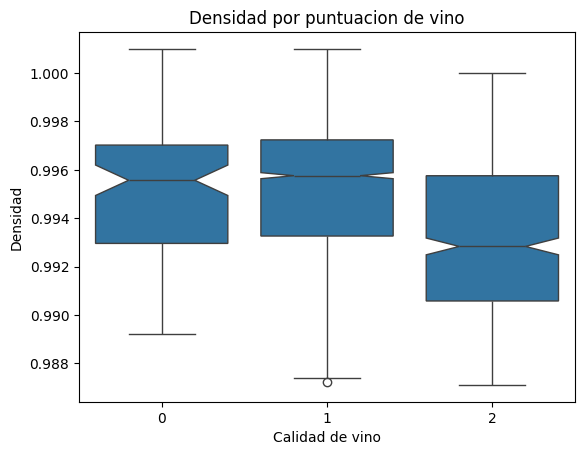

In [61]:
sns.boxplot(x='quality', y='density', data=dataset_aux, notch=True)
plt.title("Densidad por puntuacion de vino")
plt.xlabel("Calidad de vino")
plt.ylabel("Densidad")
plt.show()

Vemos acogotamiento del notch entre los grupos Baja calidad y Media calidad, lo que indica que puede no haber diferencias significativas entre los grupos.

In [56]:
# Separamos los datos en tres grupos
baja_calidad = dataset_aux[dataset_aux['quality'] == 0]['density']
media_calidad = dataset_aux[dataset_aux['quality'] == 1]['density']
alta_calidad = dataset_aux[dataset_aux['quality'] == 2]['density']

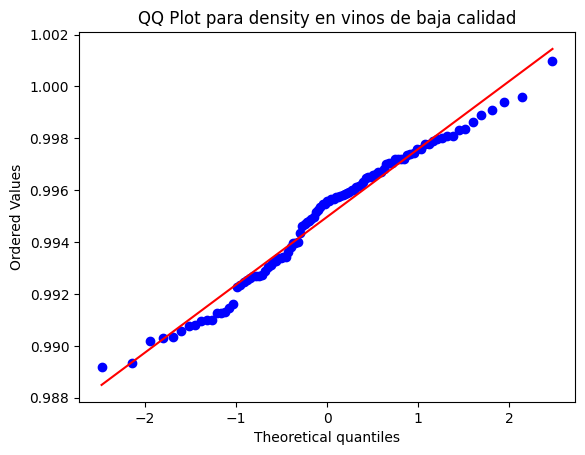

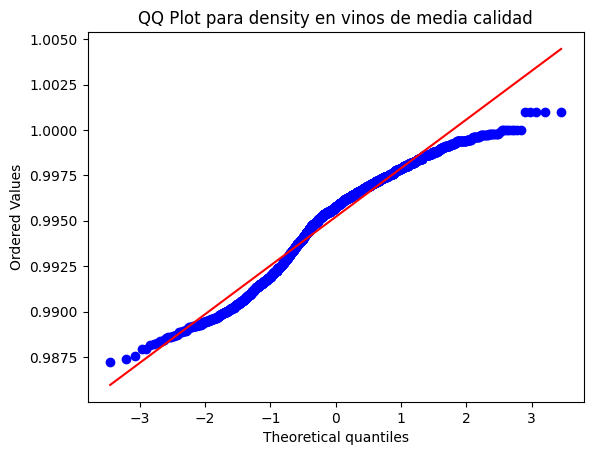

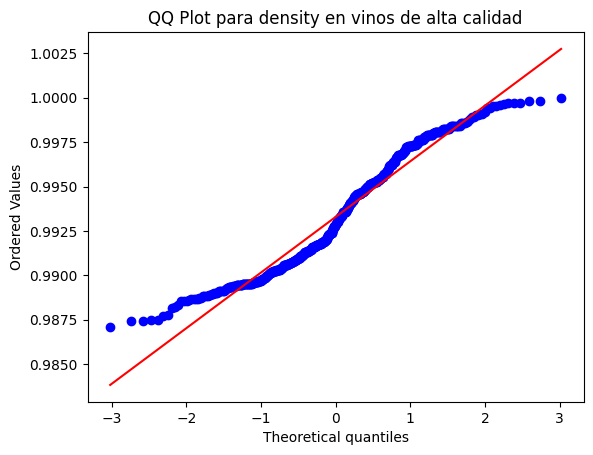

In [57]:
#Test de normalidad con QQPlot
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para vinos de baja calidad
stats.probplot(baja_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de baja calidad")
plt.show()

# QQ plot para vinos de media calidad
stats.probplot(media_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de media calidad")
plt.show()

# QQ plot  para vinos de alta calidad
stats.probplot(alta_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de alta calidad")
plt.show()

In [60]:
# Test de Shapiro-Wilk para vinos de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de baja calidad: Estadístico=0.975, p-valor=0.046
Test de Shapiro-Wilk para vinos de media calidad: Estadístico=0.960, p-valor=0.000
Test de Shapiro-Wilk para vinos de alta calidad: Estadístico=0.953, p-valor=0.000


In [62]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para density: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para density: Estadístico=26.646, p-valor=0.000


In [64]:
# Test de Kruskal-Wallis para comparar densidad entre vinos de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para density: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la densidad entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la densidad entre vinos de diferente calidad.")

Test de Kruskal-Wallis para density: Estadístico=165.840, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la densidad entre vinos de diferente calidad.


Según el experto (ChatGPT), las densidades de los vinos Moscatel y Syrah difieren, por lo que vale la pena hacer un análisis por separado.

### Syrah

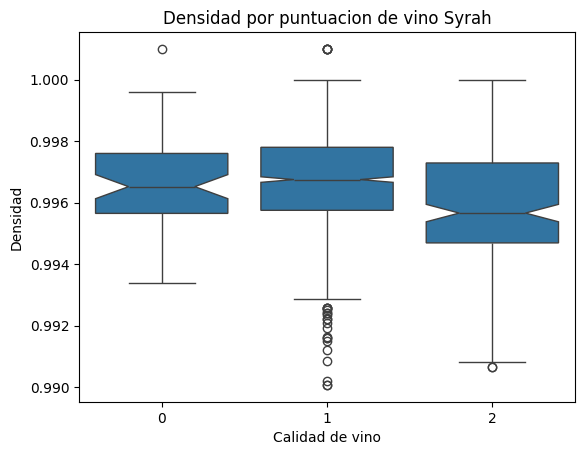

In [69]:
sns.boxplot(x='quality', y='density', data=syrah_aux, notch=True)
plt.title("Densidad por puntuacion de vino Syrah")
plt.xlabel("Calidad de vino")
plt.ylabel("Densidad")
plt.show()

Nuevamente vemos superposicion de los notch en los primeros dos grupos, lo que indica que puede no haber diferencias significativas entre dichos grupos.

In [70]:
# Separamos los datos en tres grupos
baja_calidad = syrah_aux[syrah_aux['quality'] == 0]['density']
media_calidad = syrah_aux[syrah_aux['quality'] == 1]['density']
alta_calidad = syrah_aux[syrah_aux['quality'] == 2]['density']

In [75]:
# Test de Shapiro-Wilk para vinos Syrah de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Syrah de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Syrah de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos de baja calidad: Estadístico=0.990, p-valor=0.892
Test de Shapiro-Wilk para vinos de media calidad: Estadístico=0.987, p-valor=0.000
Test de Shapiro-Wilk para vinos de alta calidad: Estadístico=0.990, p-valor=0.137


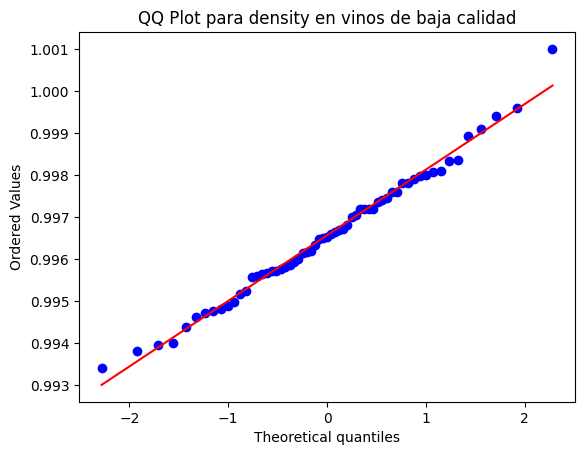

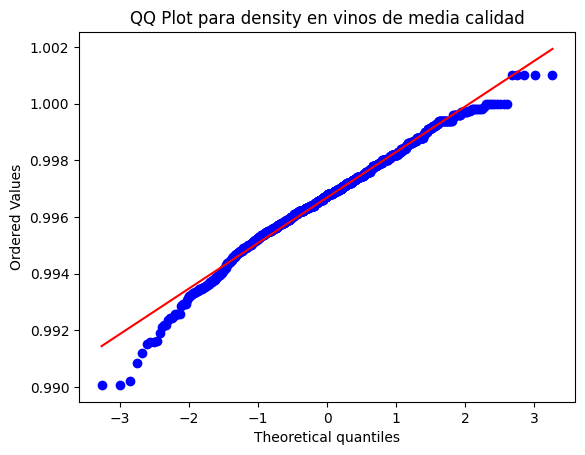

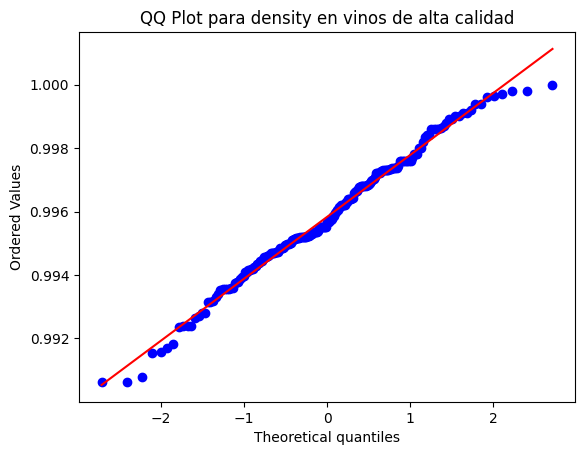

In [72]:
#Test de normalidad con QQPlot
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para vinos de baja calidad
stats.probplot(baja_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de baja calidad")
plt.show()

# QQ plot para vinos de media calidad
stats.probplot(media_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de media calidad")
plt.show()

# QQ plot  para vinos de alta calidad
stats.probplot(alta_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de alta calidad")
plt.show()

Dan distribucion normal dos de los grupos.

In [73]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para density: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para density: Estadístico=8.263, p-valor=0.000


No son homocedasticos.

In [74]:
# Test de Kruskal-Wallis para comparar densidad entre vinos Syrah de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la densidad entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la densidad entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=41.044, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la densidad entre vinos de diferente calidad.


### Moscatel

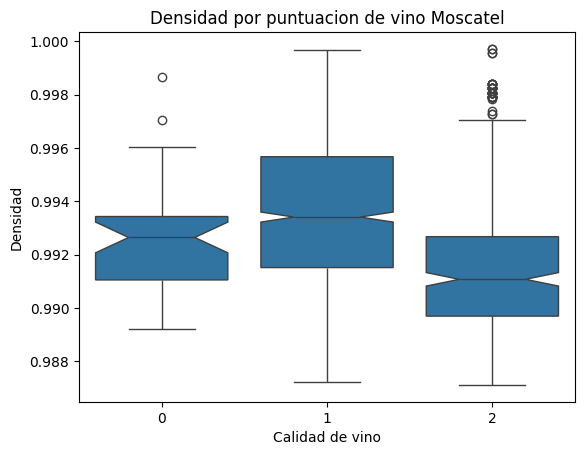

In [76]:
sns.boxplot(x='quality', y='density', data=moscatel_aux, notch=True)
plt.title("Densidad por puntuacion de vino Moscatel")
plt.xlabel("Calidad de vino")
plt.ylabel("Densidad")
plt.show()

Vemos que no hay superposicion de los notch entre los grupos, lo que indica que puede haber diferencias significativas.

In [77]:
# Separamos los datos en tres grupos
baja_calidad = moscatel_aux[moscatel_aux['quality'] == 0]['density']
media_calidad = moscatel_aux[moscatel_aux['quality'] == 1]['density']
alta_calidad = moscatel_aux[moscatel_aux['quality'] == 2]['density']

In [78]:
# Test de Shapiro-Wilk para vinos Moscatel de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico=0.946, p-valor=0.048
Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico=0.976, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico=0.870, p-valor=0.000


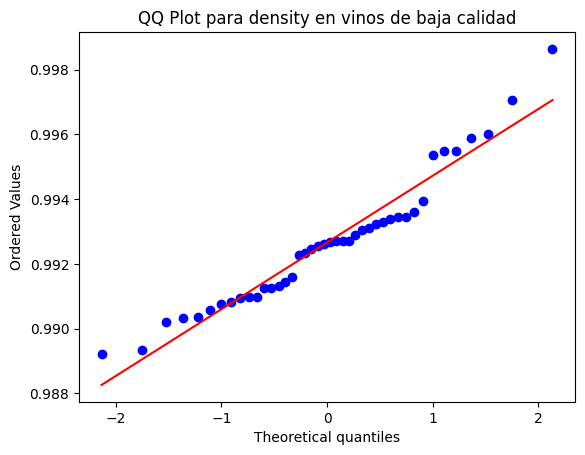

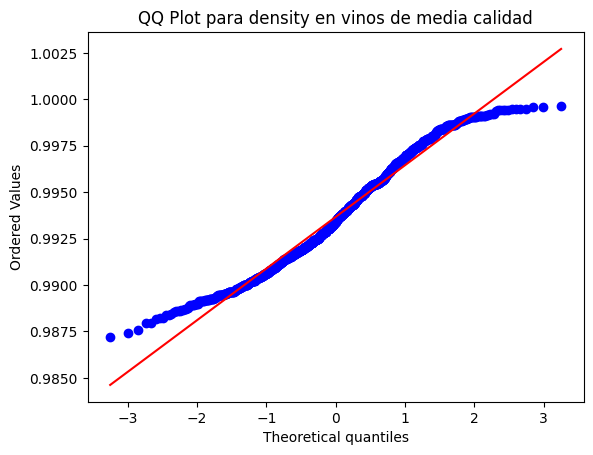

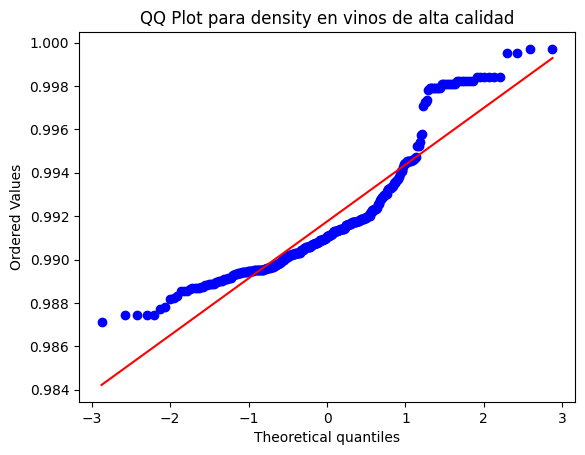

In [79]:
#Test de normalidad con QQPlot
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para vinos de baja calidad
stats.probplot(baja_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de baja calidad")
plt.show()

# QQ plot para vinos de media calidad
stats.probplot(media_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de media calidad")
plt.show()

# QQ plot  para vinos de alta calidad
stats.probplot(alta_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de alta calidad")
plt.show()

Unicamente el grupo de baja calidad tienen una distribucion normal.

In [80]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para density: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para density: Estadístico=10.814, p-valor=0.000


No son homocedasticos.

In [81]:
# Test de Kruskal-Wallis para comparar densidad entre vinos Syrah de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la densidad entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la densidad entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=139.615, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la densidad entre vinos de diferente calidad.


### Syrah profundo

Como casi encontramos algo en el analisis de los Syrah, vamos a profundizar.

In [82]:
syrah_2q=syrah_dataset.copy()
syrah_2q["quality"]=syrah_2q["quality"].map({3 : "Menor calidad" , 4 : "Menor calidad" , 5 : "Menor calidad" , 6 : "Mayor calidad" , 7 : "Mayor calidad" , 8 : "Mayor calidad"})

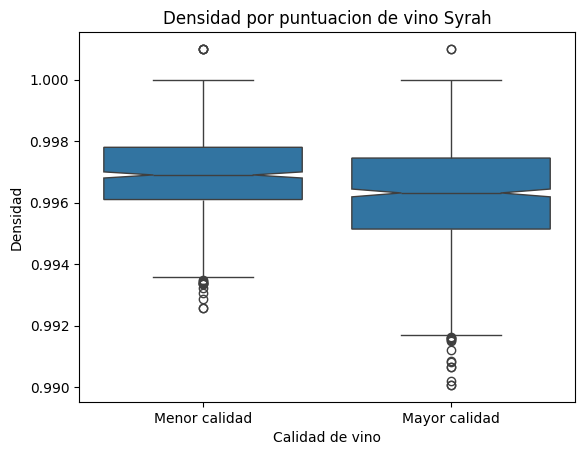

In [83]:
sns.boxplot(x='quality', y='density', data=syrah_2q, notch=True)
plt.title("Densidad por puntuacion de vino Syrah")
plt.xlabel("Calidad de vino")
plt.ylabel("Densidad")
plt.show()

No hay superposicion de los notch, lo que indica que puede haber diferencias significativas entre los grupos.

In [84]:
# Separamos los datos en tres grupos
menor_calidad = syrah_2q[syrah_2q['quality'] == "Menor calidad"]['density']
mayor_calidad = syrah_2q[syrah_2q['quality'] == "Mayor calidad"]['density']

In [85]:
# Test de Shapiro-Wilk para vinos Syrah de menor calidad
stat, p = shapiro(menor_calidad)
print(f"Test de Shapiro-Wilk para vinos de menor calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Syrah de mayor calidad
stat, p = shapiro(mayor_calidad)
print(f"Test de Shapiro-Wilk para vinos de mayor calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Shapiro-Wilk para vinos de menor calidad: Estadístico=0.993, p-valor=0.002
Test de Shapiro-Wilk para vinos de mayor calidad: Estadístico=0.990, p-valor=0.000


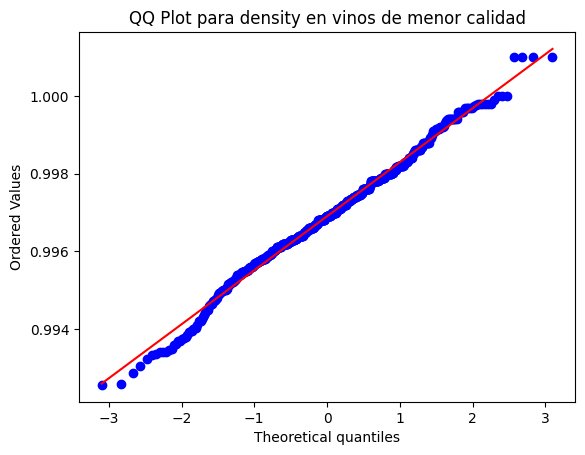

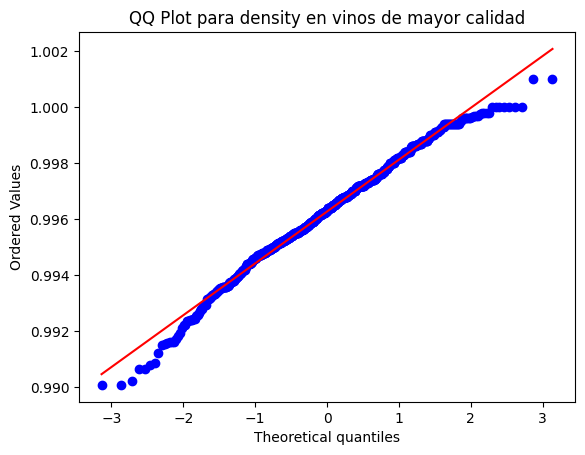

In [86]:
#Test de normalidad con QQPlot
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para vinos de menor calidad
stats.probplot(menor_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de menor calidad")
plt.show()

# QQ plot para vinos de mayor calidad
stats.probplot(mayor_calidad, dist="norm", plot=plt)
plt.title("QQ Plot para density en vinos de mayor calidad")
plt.show()

In [87]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(menor_calidad, mayor_calidad)
print(f"Test de Levene para density: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para density: Estadístico=56.614, p-valor=0.000


No son homocedasticos.

In [88]:
# Test de Kruskal-Wallis para comparar densidad entre vinos Syrah de distinta calidad
stat, p = stats.kruskal(menor_calidad, mayor_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en la densidad entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en la densidad entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=49.432, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en la densidad entre vinos de diferente calidad.


## En los Moscatel, los vinos con mayor cantidad de ácidos citricos tiene mayores puntuaciones.

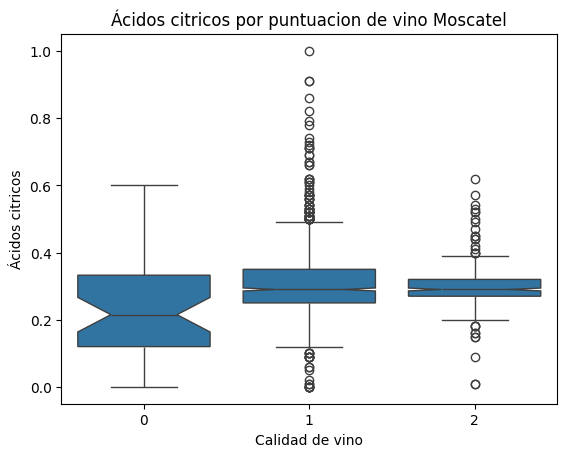

In [89]:
sns.boxplot(x='quality', y='citric acid', data=moscatel_aux, notch=True)
plt.title("Ácidos citricos por puntuacion de vino Moscatel")
plt.xlabel("Calidad de vino")
plt.ylabel("Ácidos citricos")
plt.show()

In [90]:
# Separamos los datos en tres grupos
baja_calidad = moscatel_aux[moscatel_aux['quality'] == 0]['citric acid']
media_calidad = moscatel_aux[moscatel_aux['quality'] == 1]['citric acid']
alta_calidad = moscatel_aux[moscatel_aux['quality'] == 2]['citric acid']

In [91]:
# Test de Shapiro-Wilk para vinos Moscatel de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico=0.946, p-valor=0.048
Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico=0.908, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico=0.862, p-valor=0.000


In [92]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para density: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para density: Estadístico=41.531, p-valor=0.000


In [172]:
# Test de Kruskal-Wallis para comparar los acidos citricos  entre vinos Syrah de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en los acidos citricos entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en los acidos citricos entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=4.377, p-valor=0.112
No hay suficiente evidencia para rechazar la hipótesis nula.
Existe una diferencia significativa en los acidos citricos entre vinos de diferente calidad.


## Para Moscatel, los vinos con mayor cantidad de ácidos no volátiles tienen mayor puntuacion.

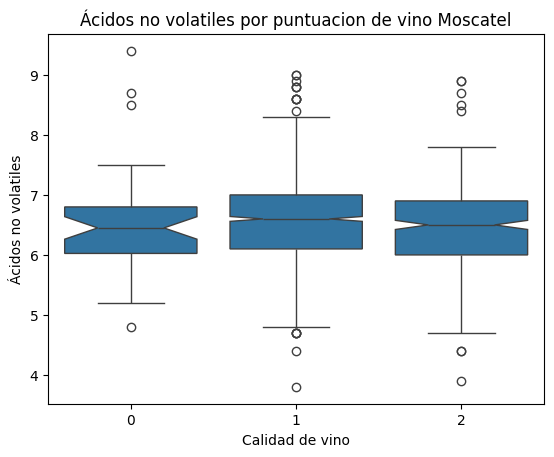

In [173]:
sns.boxplot(x='quality', y='fixed acidity', data=moscatel_aux, notch=True)
plt.title("Ácidos no volatiles por puntuacion de vino Moscatel")
plt.xlabel("Calidad de vino")
plt.ylabel("Ácidos no volatiles")
plt.show()

In [174]:
# Separamos los datos en tres grupos
baja_calidad = moscatel_aux[moscatel_aux['quality'] == 0]['fixed acidity']
media_calidad = moscatel_aux[moscatel_aux['quality'] == 1]['fixed acidity']
alta_calidad = moscatel_aux[moscatel_aux['quality'] == 2]['fixed acidity']

In [175]:
# Test de Shapiro-Wilk para vinos Moscatel de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico=0.922, p-valor=0.007
Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico=0.991, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico=0.985, p-valor=0.001


In [176]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para fixed acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para fixed acidity: Estadístico=1.171, p-valor=0.310


In [177]:
# Test de Kruskal-Wallis para comparar los acidos no volatiles entre vinos Moscatel de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en los acidos no volatiles entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en los acidos no volatiles entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=6.847, p-valor=0.033
Se rechaza la hipótesis nula.
No hay una diferencia significativa en los acidos no volatiles entre vinos de diferente calidad.


In [178]:
from scipy.stats import median_test

# Aplicamos la prueba de la mediana
stat, p_value, mediana, tabla_contingencia = median_test(baja_calidad, media_calidad, alta_calidad)

print("Estadístico de prueba:", stat)
print("Valor p:", p_value)
print("Mediana común:", mediana)
print("Tabla de contingencia:", tabla_contingencia)

Estadístico de prueba: 5.116428337681045
Valor p: 0.07744291700083705
Mediana común: 6.5
Tabla de contingencia: [[ 18 604 150]
 [ 24 598 193]]


Como nuestro p valor es mayor a nuestro nivel de significancia, entonces no podemos rechazar la hipotesis de que las medianas de los grupos son iguales.

## Para Syrah, los vinos con pH alto tienen puntuaciones menores.


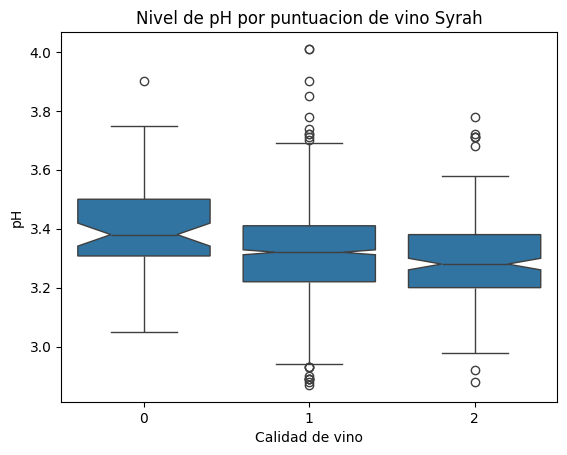

In [179]:
sns.boxplot(x='quality', y='pH', data=syrah_aux, notch=True)
plt.title("Nivel de pH por puntuacion de vino Syrah")
plt.xlabel("Calidad de vino")
plt.ylabel("pH")
plt.show()

In [180]:
# Separamos los datos en tres grupos
baja_calidad = syrah_aux[syrah_aux['quality'] == 0]['pH']
media_calidad = syrah_aux[syrah_aux['quality'] == 1]['pH']
alta_calidad = syrah_aux[syrah_aux['quality'] == 2]['pH']

In [181]:
# Test de Shapiro-Wilk para vinos Moscatel de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah de baja calidad: Estadístico=0.969, p-valor=0.130
Test de Shapiro-Wilk para vinos Syrah de media calidad: Estadístico=0.993, p-valor=0.000
Test de Shapiro-Wilk para vinos Syrah de alta calidad: Estadístico=0.980, p-valor=0.005


In [182]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para pH: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para pH: Estadístico=0.020, p-valor=0.980


In [183]:
# Test de Kruskal-Wallis para comparar los pH entre vinos Moscatel de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en los pH entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en los pH entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=20.581, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en los pH entre vinos de diferente calidad.


In [184]:
from scipy.stats import median_test

# Aplicamos la prueba de la mediana
stat, p_value, mediana, tabla_contingencia = median_test(baja_calidad, media_calidad, alta_calidad)

print("Estadístico de prueba:", stat)
print("Valor p:", p_value)
print("Mediana común:", mediana)
print("Tabla de contingencia:", tabla_contingencia)

Estadístico de prueba: 12.64459690740924
Valor p: 0.001795811170221318
Mediana común: 3.32
Tabla de contingencia: [[ 39 604  82]
 [ 21 655 125]]


Rechazamos la hipótesis nula de que las medianas de los grupos son iguales.

## En los Syrah, los vinos con mayor alcohol tienen menores puntuaciones.

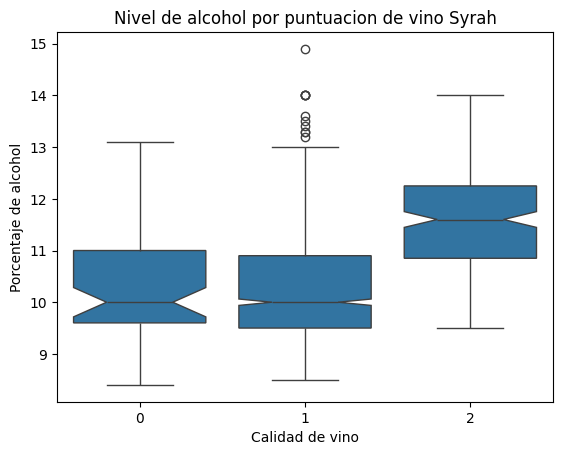

In [185]:
sns.boxplot(x='quality', y='alcohol', data=syrah_aux, notch=True)
plt.title("Nivel de alcohol por puntuacion de vino Syrah")
plt.xlabel("Calidad de vino")
plt.ylabel("Porcentaje de alcohol")
plt.show()

In [186]:
# Separamos los datos en tres grupos
baja_calidad = syrah_aux[syrah_aux['quality'] == 0]['alcohol']
media_calidad = syrah_aux[syrah_aux['quality'] == 1]['alcohol']
alta_calidad = syrah_aux[syrah_aux['quality'] == 2]['alcohol']

In [187]:
# Test de Shapiro-Wilk para vinos Syrah de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Syrah de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Syrah de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah de baja calidad: Estadístico=0.963, p-valor=0.064
Test de Shapiro-Wilk para vinos Syrah de media calidad: Estadístico=0.908, p-valor=0.000
Test de Shapiro-Wilk para vinos Syrah de alta calidad: Estadístico=0.989, p-valor=0.105


In [188]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para pH: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para pH: Estadístico=0.221, p-valor=0.802


In [189]:
from scipy.stats import median_test

# Aplicamos la prueba de la mediana
stat, p_value, mediana, tabla_contingencia = median_test(baja_calidad, media_calidad, alta_calidad)

print("Estadístico de prueba:", stat)
print("Valor p:", p_value)
print("Mediana común:", mediana)
print("Tabla de contingencia:", tabla_contingencia)

Estadístico de prueba: 162.06434356834154
Valor p: 6.429466495233168e-36
Mediana común: 10.2
Tabla de contingencia: [[ 27 519 184]
 [ 33 740  23]]


Rechazamos la hipótesis nula de que las medianas de los grupos son iguales.

In [190]:
# Test de Kruskal-Wallis para comparar los pH entre vinos Moscatel de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en los pH entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en los pH entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=234.965, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en los pH entre vinos de diferente calidad.


## En los Syrah, los vinos con concentracion alta de cloruros tienen menores puntuaciones.

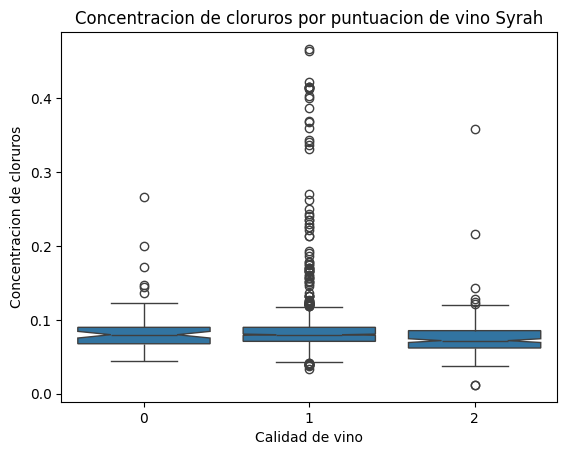

In [191]:
sns.boxplot(x='quality', y='chlorides', data=syrah_aux, notch=True)
plt.title("Concentracion de cloruros por puntuacion de vino Syrah")
plt.xlabel("Calidad de vino")
plt.ylabel("Concentracion de cloruros")
plt.show()

In [192]:
# Separamos los datos en tres grupos
baja_calidad = syrah_aux[syrah_aux['quality'] == 0]['chlorides']
media_calidad = syrah_aux[syrah_aux['quality'] == 1]['chlorides']
alta_calidad = syrah_aux[syrah_aux['quality'] == 2]['chlorides']

In [193]:
# Test de Shapiro-Wilk para vinos Syrah de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Syrah de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Syrah de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos Syrah de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Syrah de baja calidad: Estadístico=0.730, p-valor=0.000
Test de Shapiro-Wilk para vinos Syrah de media calidad: Estadístico=0.489, p-valor=0.000
Test de Shapiro-Wilk para vinos Syrah de alta calidad: Estadístico=0.661, p-valor=0.000


In [194]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para pH: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para pH: Estadístico=0.674, p-valor=0.510


In [195]:
from scipy.stats import median_test

# Aplicamos la prueba de la mediana
stat, p_value, mediana, tabla_contingencia = median_test(baja_calidad, media_calidad, alta_calidad)

print("Estadístico de prueba:", stat)
print("Valor p:", p_value)
print("Mediana común:", mediana)
print("Tabla de contingencia:", tabla_contingencia)

Estadístico de prueba: 21.654091553973483
Valor p: 1.985517703579842e-05
Mediana común: 0.079
Tabla de contingencia: [[ 32 636  69]
 [ 28 623 138]]


Rechazamos la hipótesis nula de que las medianas de los grupos son iguales.

In [157]:
# Test de Kruskal-Wallis para comparar los pH entre vinos Moscatel de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en los pH entre vinos de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en los pH entre vinos de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=35.567, p-valor=0.000
Se rechaza la hipótesis nula.
No hay una diferencia significativa en los pH entre vinos de diferente calidad.


## Los vinos Moscatel con pH bajo tienen mejores puntuaciones.

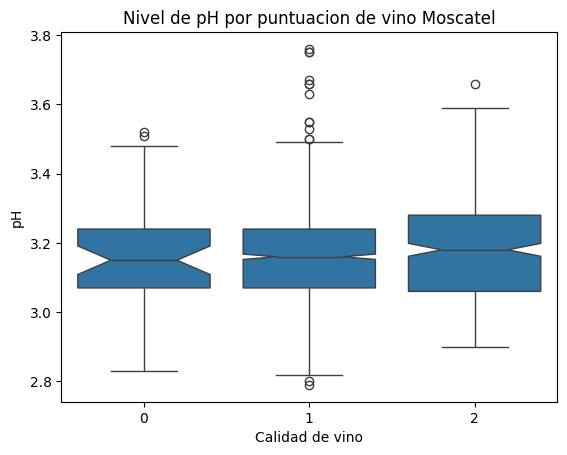

In [199]:
sns.boxplot(x='quality', y='pH', data=moscatel_aux, notch=True)
plt.title("Nivel de pH por puntuacion de vino Moscatel")
plt.xlabel("Calidad de vino")
plt.ylabel("pH")
plt.show()

In [200]:
# Separamos los datos en tres grupos
baja_calidad = moscatel_aux[moscatel_aux['quality'] == 0]['pH']
media_calidad = moscatel_aux[moscatel_aux['quality'] == 1]['pH']
alta_calidad = moscatel_aux[moscatel_aux['quality'] == 2]['pH']

In [201]:
# Test de Shapiro-Wilk para vinos Moscatel de baja calidad
stat, p = shapiro(baja_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de media calidad
stat, p = shapiro(media_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para vinos Moscatel de alta calidad
stat, p = shapiro(alta_calidad)
print(f"Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para vinos Moscatel de baja calidad: Estadístico=0.965, p-valor=0.217
Test de Shapiro-Wilk para vinos Moscatel de media calidad: Estadístico=0.987, p-valor=0.000
Test de Shapiro-Wilk para vinos Moscatel de alta calidad: Estadístico=0.985, p-valor=0.001


In [202]:
#Test de levene para nuestro analisis.
stat, p = stats.levene(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Levene para fixed acidity: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para fixed acidity: Estadístico=5.927, p-valor=0.003


In [203]:
# Test de Kruskal-Wallis para comparar los acidos no volatiles entre vinos Moscatel de distinta calidad
stat, p = stats.kruskal(baja_calidad, media_calidad, alta_calidad)
print(f"Test de Kruskal-Wallis para densidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Existe una diferencia significativa en el pH entre vinos Moscatel de diferente calidad.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay una diferencia significativa en el pH entre vinos Moscatel de diferente calidad.")

Test de Kruskal-Wallis para densidad: Estadístico=4.377, p-valor=0.112
No hay suficiente evidencia para rechazar la hipótesis nula.
Existe una diferencia significativa en el pH entre vinos Moscatel de diferente calidad.


# ??

En el caso de citric acid, vemos que no hay una distribucion normal, aun así la comparacion entre la mediana y la media nos estaría indicando lo contrario ya que son prácticamente iguales. Como la media es sensible a valores extremos, y considerando a 1 como valor extremo, y hay gran cantidad de ceros esto provoca que tome un valor más cercano a cero.

Chlorides tiene la cola pesada, la Kurtosis da 41. Esto se da por la presencia de un valor extremo. Vemos que está sesgada a derecha.

Hipotesis: Hay un vino, el que tiene valores altos de azufre, que también tiene valores altos en el resto de columnas. Provocando que casi todas las graficas esten sesgadas a derecha. 

Segun una fuente, los valores normales de densidad en el vino pueden ir desde 0.990 g/cm³ (para vinos secos) hasta alrededor de 1.020 g/cm³ (para vinos dulces), con el mosto antes de la fermentación alcanzando valores más altos debido a su contenido de azúcar.
Vemos que hay 75 filas que superan ampliamente el valor máximo (llegando a valores de +100). Al representar tan solo un 2% de las muestras totales, decidimos descartarlas.

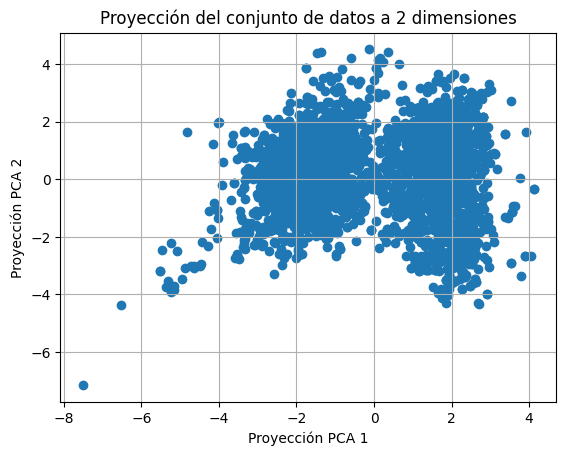

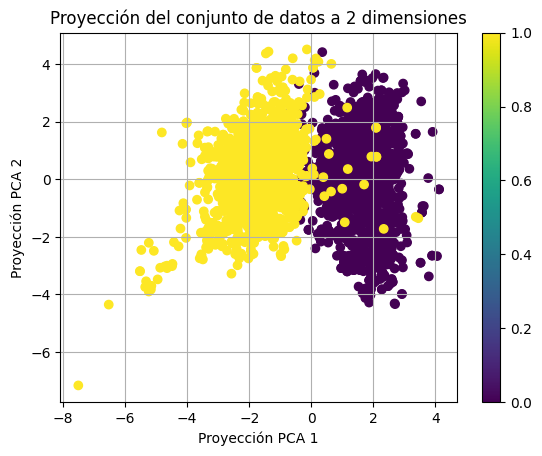

In [75]:
#Los desvíos son muy distintos (p.e. total sulfur dioxide y volatile acidity), por lo tanto las varianzas también. Tenemos que estandarizar.
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Convertir la columna "type" a valores numéricos
le = LabelEncoder()
type_encoded = le.fit_transform(preprocessed_dataset["type"])
pca_dataset=preprocessed_dataset.drop(columns="type")

# estandarizamos X
scaler = StandardScaler()
preprocessed_dataset_scaled = scaler.fit_transform(pca_dataset)

#print(np.std(prep, axis=0))

# Ahora aplicamos PCA a los datos estandarizados
pca = PCA(n_components=2)
x_pca = pca.fit_transform(preprocessed_dataset_scaled)
# graficamos los datos
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

plt.scatter(x_pca[:,0], x_pca[:,1], c=type_encoded, cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()